In [1]:
import numpy as np
import freegs
from freegs.plotting import plotConstraints
from freegs.critical import find_critical
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import sys
import matplotlib.pyplot as plt
from copy import deepcopy
from IPython.display import display, clear_output
import time
import pickle

%load_ext autoreload
%autoreload 2

In [2]:
# import pickle
# with open('../freegsnke/Fiesta_full_passive.pk', 'rb') as f:
#     data = pickle.load(f)
# passive_coils = []
# # R, Z, dR, dZ, resistivity
# for l in data[0]:
#     passive_coils.append({
#         "R": l[0],
#         "Z": l[1],
#         "dR": l[2],
#         "dZ": l[3],
#         "resistivity": l[4]
#     })

# pickle.dump(passive_coils, open("passive_coils.pk", "wb"))


In [3]:
# rwall = [1.56442 , 1.73298 , 1.34848 , 1.0882  , 0.902253, 0.903669,
#     0.533866, 0.538011, 0.332797, 0.332797, 0.334796, 0.303115,
#     0.305114, 0.269136, 0.271135, 0.260841, 0.260841, 0.271135,
#     0.269136, 0.305114, 0.303115, 0.334796, 0.332797, 0.332797,
#     0.538598, 0.534469, 0.90563 , 0.904219, 1.0882  , 1.34848 ,
#     1.73018 , 1.56442 , 1.37999 , 1.37989 , 1.19622 , 1.19632 ,
#     1.05537 , 1.05528 , 0.947502, 0.905686, 0.899143, 0.883388,
#     0.867681, 0.851322, 0.833482, 0.826063, 0.822678, 0.821023,
#     0.820691, 0.822887, 0.827573, 0.839195, 0.855244, 0.877567,
#     0.899473, 1.18568 , 1.279   , 1.296   , 1.521   , 1.521   ,
#     1.8     , 1.8     , 1.521   , 1.521   , 1.296   , 1.279   ,
#     1.18568 , 0.899473, 0.877567, 0.855244, 0.839195, 0.827573,
#     0.822887, 0.820691, 0.821023, 0.822678, 0.826063, 0.833482,
#     0.851322, 0.867681, 0.883388, 0.899143, 0.905686, 0.947502,
#     1.05528 , 1.05537 , 1.19632 , 1.19622 , 1.37989 , 1.37999 ,
#     1.56442 ]

# zwall = [ 1.56424 ,  1.67902 ,  2.06041 ,  2.05946 ,  1.87565 ,  1.87424 ,
#     1.50286 ,  1.49874 ,  1.29709 ,  1.094   ,  1.094   ,  0.8475  ,
#     0.8475  ,  0.565   ,  0.565   ,  0.495258, -0.507258, -0.577   ,
#     -0.577   , -0.8595  , -0.8595  , -1.106   , -1.106   , -1.30909 ,
#     -1.5099  , -1.51403 , -1.88406 , -1.88547 , -2.06614 , -2.06519 ,
#     -1.68099 , -1.56884 , -1.57688 , -1.57673 , -1.58475 , -1.5849  ,
#     -1.59105 , -1.59091 , -1.59561 , -1.59556 , -1.59478 , -1.59026 ,
#     -1.58087 , -1.56767 , -1.54624 , -1.52875 , -1.51517 , -1.49624 ,
#     -1.47724 , -1.44582 , -1.41923 , -1.38728 , -1.35284 , -1.3221  ,
#     -1.30018 , -1.0138  , -0.8423  , -0.8202  , -0.8202  , -0.25    ,
#     -0.25    ,  0.25    ,  0.25    ,  0.8156  ,  0.8156  ,  0.8377  ,
#     1.0092  ,  1.29558 ,  1.3175  ,  1.34824 ,  1.38268 ,  1.41463 ,
#     1.44122 ,  1.47264 ,  1.49164 ,  1.51057 ,  1.52415 ,  1.54164 ,
#     1.56307 ,  1.57627 ,  1.58566 ,  1.59018 ,  1.59096 ,  1.59101 ,
#     1.58631 ,  1.58645 ,  1.5803  ,  1.58015 ,  1.57213 ,  1.57228 ,
#     1.56424 ]

# wall = []
# for i in range(len(rwall)):
#     wall.append({"R": rwall[i], "Z": zwall[i]})

# pickle.dump(wall, open("wall.pk", "wb"))

In [4]:
# with open('../machine_configs/MAST-U/active_coils.pkl', 'rb') as f:
#     active_coils = pickle.load(f)
# active_coils

In [5]:
# %matplotlib notebook

In [6]:
# with open('../machine_configs/MAST-U/active_coils_from_UDA.pickle", 'rb') as f:
#     active_coils_UDA = pickle.load(f)
# active_coils

In [2]:
# Create the machine, which specifies coil locations
# and equilibrium, specifying the domain to solve over
# this has to be either
# freegs.machine.MASTU(), in which case:
#tokamak = freegs.machine.MASTU()
# or
# MASTU_coils.MASTU_wpass()
import os
os.environ["ACTIVE_COILS_PATH"] = "../machine_configs/_simpleMAST-U/active_coils.pickle"
os.environ["PASSIVE_COILS_PATH"] = "../machine_configs/_simpleMAST-U/passive_coils.pickle"
os.environ["WALL_PATH"] = "../machine_configs/_simpleMAST-U/wall.pickle"
os.environ["LIMITER_PATH"] = "../machine_configs/_simpleMAST-U/limiter.pickle"

from freegsnke import machine_config
from freegsnke import build_machine
from freegsnke import faster_shape

tokamak = build_machine.tokamak()


# Creates equilibrium object and initializes it with 
# a "good" solution
# plasma_psi = np.loadtxt('plasma_psi_example.txt')
eq = freegs.Equilibrium(tokamak=tokamak,
                        #domains can be changed 
                        Rmin=0.1, Rmax=2.0,    # Radial domain
                        Zmin=-2.2, Zmax=2.2,   # Height range
                        #grid resolution can be changed
                        nx=129, ny=129, # Number of grid points
                        # psi=plasma_psi[::2,:])   
                        )  



# Sets desired plasma properties for the 'starting equilibrium'
# values can be changed
from freegsnke.jtor_update import ConstrainPaxisIp
profiles = ConstrainPaxisIp(eq, tokamak.limiter,
                            8.1e3, # Plasma pressure on axis [Pascals]
                            6.2e5, # Plasma current [Amps]
                            0.5, # vacuum f = R*Bt
                            alpha_m = 1.8,
                            alpha_n = 1.2)


# Sets some shape constraints (here very close to those used for initialization)
Rx = 0.55
Zx = 1.1

Rmid = 1.5  # Outboard midplane
Rin = 0.35  # Inboard midplane

xpoints = [(Rx, -Zx-.01),   # (R,Z) locations of X-points
           (Rx,  Zx)]
isoflux = [
           (Rx,Zx, Rx,-Zx),
           (Rmid, 0, Rin, 0.0),
           (Rmid,0, Rx,Zx),
    
           # Link inner and outer midplane locations
           (Rx, Zx, .85, 1.5),
           (Rx, Zx, .75, 1.5),
           (Rx, Zx, Rin, 0.2),
           (Rx, Zx, Rin, 0.1),
           (Rx,-Zx, Rin, -0.1),
           (Rx,-Zx, Rin, -0.2),
           (Rx,-Zx, .85, -1.5),
           (Rx,-Zx, .75, -1.5),

        #    (Rx,-Zx, 0.45, -1.8),
        #    (Rx, Zx, 0.45,  1.8),
           ]

eq.tokamak['P6'].current = 0
eq.tokamak['P6'].control = False
eq.tokamak['Solenoid'].control = False

constrain = freegs.control.constrain(xpoints=xpoints, 
                                     gamma=1e-6, 
                                     isoflux=isoflux
                                    )
constrain(eq)
                                    
from freegsnke import GSstaticsolver
NK = GSstaticsolver.NKGSsolver(eq)                        


currents = {'Solenoid': 60000,
 'PX': 6210.2107489530945,
 'D1': 271914.67486611096,
 'D2': 52276.74921445014,
 'Dp': -23198.29245784716,
 'P4': -83210.36982350699,
 'P5': -77417.6787166016,
 'P6': 0}

for coil in currents.keys():
  eq.tokamak[coil].current = currents[coil]


with open("paper/eq1.pickle", 'rb') as f:
    eq1data = pickle.load(f)
eq.plasma_psi = eq1data[1]

Text(0.5, 1.0, 'q profile')

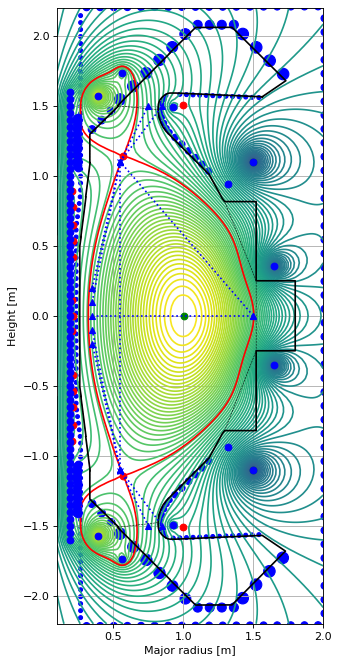

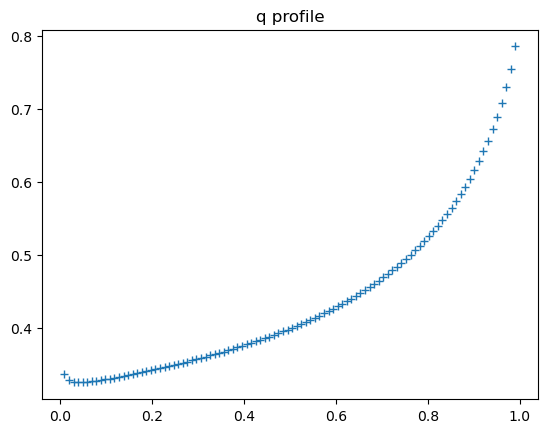

In [3]:
# eq.tokamak['P6'].current = 0
# eq.tokamak['P6'].control = False
# eq.tokamak['Solenoid'].control = False
# # eq.tokamak['Solenoid'].current = 15000
# eq.tokamak['Solenoid'].current = 0
# freegs.solve(eq,          # The equilibrium to adjust
#              profiles,    # The plasma profiles
#              constrain,   # Plasma control constraints
#              show=False,
#              rtol=3e-3)               

# eq.tokamak['Solenoid'].current = 15000
# freegs.solve(eq,          # The equilibrium to adjust
#              profiles,    # The plasma profiles
#              constrain,   # Plasma control constraints
#              show=False,
#              rtol=3e-3)               
# eq.tokamak['Solenoid'].current = 40000
# freegs.solve(eq,          # The equilibrium to adjust
#              profiles,    # The plasma profiles
#              constrain,   # Plasma control constraints
#              show=False,
#              rtol=3e-3)  
NK.solve(eq, profiles, target_relative_tolerance=1e-8)
fig = plt.figure(figsize=(5, 10), dpi=80);
ax = fig.add_subplot(111);
ax.grid(True,which='both');
eq.plot(axis=ax,show=False);
eq.tokamak.plot(axis=ax,show=False);
constrain.plot(axis=ax,show=False)

qprof = eq.q()
plt.figure()
plt.plot(qprof[0], qprof[1], '+')
plt.title('q profile')

In [155]:
# Initialize the evolution object
# This uses the starting equilibrium to get all the geometric constraints/grids etc
from freegsnke import nonlinear_solve
stepping = nonlinear_solve.nl_solver(profiles=profiles, eq=eq, 
                                     max_mode_frequency=10**2.8, 
                                     full_timestep=1.14e-3, 
                                     max_internal_timestep=1,
                                     plasma_resistivity=1e-6,
                                     plasma_domain_mask=None,
                                     automatic_timestep=False, #(1/10, 1/10),
                                     mode_removal=False,
                                     dIydI=dIydI,
                                     dIydpars=dIydpars,
                                     min_dIy_dI=1,
                                     nbroad=1,
                                     verbose=True
                                     )

# In absence of a policy, this calculates the active voltages U_active
# to maintain the currents needed for the equilibrium statically
U_active = (stepping.vessel_currents_vec*stepping.evol_metal_curr.R)[:stepping.evol_metal_curr.n_active_coils]

Input max_mode_frequency corresponds to  52  independent vessel normal modes in addition to the  8  active coils.
This equilibrium has a linear growth rate of 1/ 0.01140116457646398 s
The solver's timestep was set at 0.00114  as explicitly requested. Please compare this with the linear growth rate above and, if necessary, reset.


In [6]:
dIydI = stepping.dIydI.copy()
dIydpars = stepping.dIydpars.copy()

In [7]:
n_GS = {}

In [13]:
noise_vec = 1.0*stepping.noise_vec

In [59]:
key = '0'

# Example of evolution with constant applied voltages
t = 0
flag = 0
history_times = [t]
t_per_step = []


#use the following to reset stepping.eq1 to a new IC
stepping.initialize_from_ICs(eq, profiles,
                            #  noise_level=1, )

                             noise_vec=noise_vec,)
                            #  update_linearization=False,
                            #  update_n_steps=12,
                            #  threshold_svd=.15)
# eqs = deepcopy(stepping.eq1)

history_currents = [stepping.currents_vec]
history_equilibria = [deepcopy(stepping.eq1)]
history_profiles = [deepcopy(stepping.profiles1)]
shapes = faster_shape.shapes_f(stepping.eq1, stepping.profiles1)
history_width = [shapes[0]]
history_o_points = shapes[1]
history_elongation = [shapes[2]]
# history_dJs = [stepping.dJ]

counter = 0
max_count = 35
interm_counter = 0
ngs = []
tol = []
while counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    residuals = stepping.nlstepper(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.0001,
                                        # F_function=stepping.F_function_ceq_GS,
                                        target_relative_tol_GS=.0001,
                                        
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=None,
                                        profile_coefficients=None,
                                        # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                                                    #    1.2*(1+0.0001*np.random.randn())]),

                                        working_relative_tol_GS=.00003,
                                        # target_relative_unexplained_residual=.5,
                                        # max_n_directions=3,
                                        # max_Arnoldi_iterations=3,
                                        # max_collinearity=.3,
                                        # step_size=.8,
                                        # step_size_curr=.8,
                                        step_size_psi=.3,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        max_no_NK_psi=5.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=2,
                                        linear_only=False)   
    counter_all = np.shape(stepping.record_Iys)[0]
    ngs.append(counter_all - interm_counter)
    stepping.reset_records_for_linearization_update()
    # stepping.run_linearization_update(40, 10, .05)
    interm_counter = np.shape(stepping.record_Iys)[0]
    tol.append([residuals, [stepping.d_plasma_psi_step, stepping.curr_step]])

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq1))
    history_profiles.append(deepcopy(stepping.profiles1))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

n_GS[key] = {}
n_GS[key]['n'] = ngs
n_GS[key]['t'] = t_per_step
n_GS[key]['tol'] = tol

'Step: 34/34'

'current time t = 0.038759999999999996'

'current time step dt = 0.00114'

starting numerical solve:
max(residual on current eqs) = 11.193167856332636 mean(residual on current eqs) = 1.243082474956411
This is NK cycle no 0.
['relative_psi_res', 0.6643602999242891]
[['The coefficients applied to psi are', array([1.99080695])]]
['The coeffs applied to the current vec = ', array([1.23978457])]
['The final residual on the current (relative): max =', 1.3940214321737836, 'mean =', 0.17407491642921213]
['Residuals on GS eq (relative): ', 0.07487372833232289]
This is NK cycle no 1.
['relative_psi_res', 0.8009205787407746]
[['The coefficients applied to psi are', array([-5., -5.])]]
['The coeffs applied to the current vec = ', array([1.14567911])]
['The final residual on the current (relative): max =', 1.8188761821027608, 'mean =', 0.08615892030772915]
['Residuals on GS eq (relative): ', 0.09531352658964787]
This is NK cycle no 2.
['relative_psi_res', 0.2040109179700875]
[['The coefficients applied to psi are', array([-5., -5.])]]
['The coeffs applied to the current v

KeyboardInterrupt: 

In [23]:
np.shape(stepping.vessel_currents_vec)

(267,)

In [76]:
key = 'curr_GS'

# Example of evolution with constant applied voltages
t = 0

t_per_step = []
ngs = []
tol = []

history_currents_ = []

for i in range(34):

    stepping.initialize_from_ICs(hh_ep[0][i], 
                                 hh_ep[1][i],
                                 noise_level=0, )
    
    clear_output(wait=True)
    display(f'Step: {i}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')

    t_start = time.time()
    residuals = stepping.nlstepper_currents_only(active_voltage_vec=U_active, 
                                                target_relative_tol_currents=.0001,
                                                F_function=stepping.F_function_curr_GS,
                                                profile_parameter=None,
                                                profile_coefficients=None,
                                                working_relative_tol_GS=.00003,
                                                # target_relative_unexplained_residual=.5,
                                                max_n_directions=3,
                                                max_Arnoldi_iterations=6,
                                                max_solving_iterations=20,
                                                verbose=2,
                                                linear_only=False)   


    counter_all = np.shape(stepping.record_Iys)[0]
    ngs.append(counter_all - interm_counter)
    stepping.reset_records_for_linearization_update()
    # stepping.run_linearization_update(40, 10, .05)
    interm_counter = np.shape(stepping.record_Iys)[0]
    tol.append([residuals, [stepping.d_plasma_psi_step, stepping.curr_step]])

    t_end = time.time()
    t_per_step.append(t_end-t_start)

    history_currents_.append(stepping.currents_vec)


n_GS[key] = {}
n_GS[key]['n'] = ngs
n_GS[key]['t'] = t_per_step
n_GS[key]['tol'] = tol

'Step: 33/34'

'current time t = 0'

'current time step dt = 0.00114'

starting numerical solve:
max(residual on current eqs) = 36.98871148096305 mean(residual on current eqs) = 2.519356483828434
This is NK cycle no 0.
['The coeffs applied to the current vec = ', array([ 0.79714348, -0.44915996])]
['The final residual on the current (relative): max =', 6.166319913911247, 'mean =', 0.7470390031487096]
This is NK cycle no 1.
['The coeffs applied to the current vec = ', array([-2.53452009, -2.8196314 , -2.30542632])]
['The final residual on the current (relative): max =', 3.8519147946346832, 'mean =', 0.2264071117540216]
This is NK cycle no 2.
['The coeffs applied to the current vec = ', array([ 0.72145169, -0.5957099 ])]
['The final residual on the current (relative): max =', 4.519198768357255, 'mean =', 0.10638966990139358]
This is NK cycle no 3.
['The coeffs applied to the current vec = ', array([-3.41272244, -2.09456842, -2.02585078])]
['The final residual on the current (relative): max =', 2.4386357888159753, 'mean =', 0.05386226688188832]
This is NK cy

In [77]:
key = 'ceq_GS'

# Example of evolution with constant applied voltages
t = 0

t_per_step = []
ngs = []
tol = []

history_currents_ = []

for i in range(5):

    stepping.initialize_from_ICs(hh_ep[0][i], 
                                 hh_ep[1][i],
                                 noise_level=0, )
    
    clear_output(wait=True)
    display(f'Step: {i}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')

    t_start = time.time()
    residuals = stepping.nlstepper_currents_only(active_voltage_vec=U_active, 
                                                target_relative_tol_currents=.00001,
                                                F_function=stepping.F_function_ceq_GS,
                                                profile_parameter=None,
                                                profile_coefficients=None,
                                                working_relative_tol_GS=.0003,
                                                # target_relative_unexplained_residual=.5,
                                                max_n_directions=3,
                                                max_Arnoldi_iterations=6,
                                                max_solving_iterations=20,
                                                verbose=2,
                                                linear_only=False)   


    counter_all = np.shape(stepping.record_Iys)[0]
    ngs.append(counter_all - interm_counter)
    stepping.reset_records_for_linearization_update()
    # stepping.run_linearization_update(40, 10, .05)
    interm_counter = np.shape(stepping.record_Iys)[0]
    tol.append([residuals, [stepping.d_plasma_psi_step, stepping.curr_step]])

    t_end = time.time()
    t_per_step.append(t_end-t_start)

    history_currents_.append(stepping.currents_vec)


n_GS[key] = {}
n_GS[key]['n'] = ngs
n_GS[key]['t'] = t_per_step
n_GS[key]['tol'] = tol

'Step: 4/34'

'current time t = 0'

'current time step dt = 0.00114'

starting numerical solve:
max(residual on current eqs) = 0.014031434038546288 mean(residual on current eqs) = 0.0015008909142298138
This is NK cycle no 0.
['The coeffs applied to the current vec = ', array([-2.34194734])]
['The final residual on the current (relative): max =', 0.036072587782488896, 'mean =', 0.0018084889197020522]
This is NK cycle no 1.
['The coeffs applied to the current vec = ', array([-1.51630066])]
['The final residual on the current (relative): max =', 0.032038861316688136, 'mean =', 0.0017647202334615253]
This is NK cycle no 2.
['The coeffs applied to the current vec = ', array([-5.])]
['The final residual on the current (relative): max =', 0.018918008840411712, 'mean =', 0.0015949646280484175]
This is NK cycle no 3.
['The coeffs applied to the current vec = ', array([-5.])]
['The final residual on the current (relative): max =', 0.018328674115601403, 'mean =', 0.0014268872894872362]
This is NK cycle no 4.
['The coeffs applied to the current vec = ', array([-2.54

In [156]:
key = 'curr_psi_GS'

# Example of evolution with constant applied voltages
t = 0

t_per_step = []
ngs = []
tol = []

history_currents_ = []

for i in range(4):

    stepping.initialize_from_ICs(hh_ep[0][i], 
                                 hh_ep[1][i],
                                 noise_level=0, )
    
    clear_output(wait=True)
    display(f'Step: {i}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')

    t_start = time.time()
    residuals = stepping.nlstepper_currents_psiplasma(active_voltage_vec=U_active, 
                                                        target_relative_tol_currents=.0001,
                                                        target_relative_tol_GS=.0001,
                                                        F_function=stepping.F_function_1,
                                                        profile_parameter=None,
                                                        profile_coefficients=None,
                                                        working_relative_tol_GS=.00003,
                                                        # target_relative_unexplained_residual=.5,
                                                        max_n_directions=3,
                                                        max_Arnoldi_iterations=6,
                                                        max_solving_iterations=20,
                                                        verbose=2,
                                                        linear_only=False)   

    counter_all = np.shape(stepping.record_Iys)[0]
    ngs.append(counter_all - interm_counter)
    stepping.reset_records_for_linearization_update()
    # stepping.run_linearization_update(40, 10, .05)
    interm_counter = np.shape(stepping.record_Iys)[0]
    tol.append([residuals, [stepping.d_plasma_psi_step, stepping.curr_step]])

    t_end = time.time()
    t_per_step.append(t_end-t_start)

    history_currents_.append(stepping.currents_vec)


n_GS[key] = {}
n_GS[key]['n'] = ngs
n_GS[key]['t'] = t_per_step
n_GS[key]['tol'] = tol

'Step: 1/34'

'current time t = 0'

'current time step dt = 0.00114'

starting numerical solve:
max(relative residual on current eqs) = 0.5338016391974779 mean(relative residual on current eqs) = 0.04798061475101816
max(relative residual on GS eqs) = 1.6366135957172744e-07
self.full_nk_solver.nR0 0.0011807828803337456
self.full_nk_solver.relative_unexplained_residual 0.9718285028368967
This is NK cycle no 0.
['The coeffs applied to the full vec = ', array([0.03890303, 0.27958957])]
['The final residual on the current (relative): max =', 0.5659960484930482, 'mean =', 0.04595497311391375]
['The final residual on GS (relative): max =', 0.0002648415855730929]
self.full_nk_solver.nR0 0.0011475183650687462
self.full_nk_solver.relative_unexplained_residual 0.9996022802761577
This is NK cycle no 1.
['The coeffs applied to the full vec = ', array([-0.00290064, -0.18355509])]
['The final residual on the current (relative): max =', 0.5651903269744278, 'mean =', 0.04562029469317215]
['The final residual on GS (relative): max =', 0.00030621426665682533]
self.full_nk_

KeyboardInterrupt: 

In [109]:
key = '0_full'

# Example of evolution with constant applied voltages
t = 0

t_per_step = []
ngs = []
tol = []

history_currents_ = []

for i in [33]:

    stepping.initialize_from_ICs(hh_ep[0][i], 
                                 hh_ep[1][i],
                                 noise_level=0, )
    
    clear_output(wait=True)
    display(f'Step: {i}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')

    t_start = time.time()
    residuals = stepping.nlstepper(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.0001,
                                        # F_function=stepping.F_function_ceq_GS,
                                        target_relative_tol_GS=.00003,
                                        
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=None,
                                        profile_coefficients=None,
                                        # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                                                    #    1.2*(1+0.0001*np.random.randn())]),

                                        working_relative_tol_GS=.00001,
                                        # target_relative_unexplained_residual=.5,
                                        # max_n_directions=3,
                                        # max_Arnoldi_iterations=3,
                                        # max_collinearity=.3,
                                        # step_size=.8,
                                        # step_size_curr=.8,
                                        step_size_psi=.3,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        max_no_NK_psi=1.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=2,
                                        linear_only=False) 


    counter_all = np.shape(stepping.record_Iys)[0]
    ngs.append(counter_all - interm_counter)
    stepping.reset_records_for_linearization_update()
    # stepping.run_linearization_update(40, 10, .05)
    interm_counter = np.shape(stepping.record_Iys)[0]
    tol.append([residuals, [stepping.d_plasma_psi_step, stepping.curr_step]])

    t_end = time.time()
    t_per_step.append(t_end-t_start)

    history_currents_.append(stepping.currents_vec)


n_GS[key] = {}
n_GS[key]['n'] = ngs
n_GS[key]['t'] = t_per_step
n_GS[key]['tol'] = tol

'Step: 33/34'

'current time t = 0'

'current time step dt = 0.00114'

starting numerical solve:
max(residual on current eqs) = 36.98871148096305 mean(residual on current eqs) = 2.519356483828434
This is NK cycle no 0.
['relative_psi_res', 0.2778987145809653]
[['The coefficients applied to psi are', array([-5., -5.])]]
['The coeffs applied to the current vec = ', array([1.18863196])]
['The final residual on the current (relative): max =', 2.8802397209480315, 'mean =', 0.19558332321820562]
['Residuals on GS eq (relative): ', 0.026465146907089798]
This is NK cycle no 1.
['relative_psi_res', 0.10297593807723782]
[['The coefficients applied to psi are', array([-5.       , -4.7907388])]]
['The coeffs applied to the current vec = ', array([1.13646013])]
['The final residual on the current (relative): max =', 0.837936753599921, 'mean =', 0.04007411441302837]
['Residuals on GS eq (relative): ', 0.018368287993494874]
This is NK cycle no 2.
['relative_psi_res', 0.05791569148221353]
[['The coefficients applied to psi are', array([-5.        , -3.34952304])]]
['The c

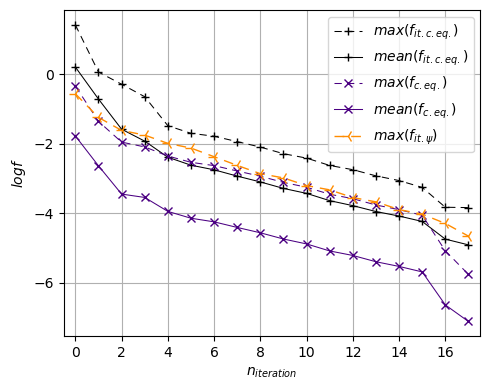

In [301]:
plt.figure(figsize=(5,4))
kk=33
# plt.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:-1,0]), '+')
# plt.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:-1,1]), '+')
plt.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:-1,0]), ls=(0, (7, 5)), marker='+', lw=.75, color = 'k', label='$max(f_{it.c.eq.})$')
plt.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:-1,1]), marker='+', lw=.75, color = 'k', label='$mean(f_{it.c.eq.})$')

# plt.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][1])[:-1,0]), 'x')
# plt.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][1])[:-1,1]), 'x')
plt.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][1])[:-1,0]), color = 'indigo',ls=(0, (7, 5)), marker='x', lw=.75, label='$max(f_{c.eq.})$')
plt.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][1])[:-1,1]), color = 'indigo',marker='x', lw=.75, label='$mean(f_{c.eq.})$')

# plt.plot(np.log10(np.array(n_GS['0_full']['tol'][0][0][2])[::2,0]), '3')
plt.plot(np.log10(np.array(n_GS['0_full']['tol'][0][0][2])[::2,0]), color = 'darkorange',ls=(0, (7, 5)), marker='3', lw=1., markersize=9, label='$max(f_{it.\psi})$')
# plt.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][1])[:-1,0]), '--', lw=.75)
# plt.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][1])[:-1,1]), lw=.75)

plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(.81, 1),
          ncol=1,  fontsize=10)

plt.xlabel('$n_{iteration}$')
plt.ylabel('$log f$')

plt.xlim(-.5,17.5)

plt.tight_layout()
plt.savefig('paper/convergence_comp_0.pdf')

Text(0.5, 1.0, 'Similarity Loss')

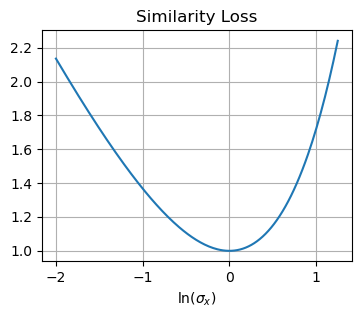

In [105]:
plt.figure(figsize=(4,3))
x = np.linspace(-2,1.25,200)
plt.plot(x, np.exp(x)-x )
plt.grid()
plt.xlabel('$\ln(\sigma_x)$')
plt.title('Similarity Loss')

In [82]:
n_GS['0']['tol'][4][0][0]

[[1.8967032986785406, 0.09861132239243149],
 [0.1839829208974982, 0.01678973749914053],
 [0.03694192640095403, 0.0019705186582293405],
 [0.01244495432861832, 0.0010578873494063584],
 [0.004444192456276088, 0.0004374045560208703],
 [0.0019344289761066046, 0.0002156830663741997],
 [0.0014991875716874326, 0.00014291888384399982],
 [0.0014157208618308162, 0.00010111606879906493],
 [0.0005266608929235179, 4.7319019221859305e-05],
 [0.0002019044831216475, 1.2718860696497357e-05],
 [0.0002068217686243735, 2.094564597266464e-05],
 [4.529620798075751e-05, 3.6206636570833545e-06]]

In [232]:
idxs = np.arange(18,34)

In [270]:
idxs = [1,2,29,3,4,10,11, 14, 20, 33, 7, 23, 24, 27, 28, 29, 33]
len(idxs)

17

29
10
11
14
20
33
7
23
24
27
28


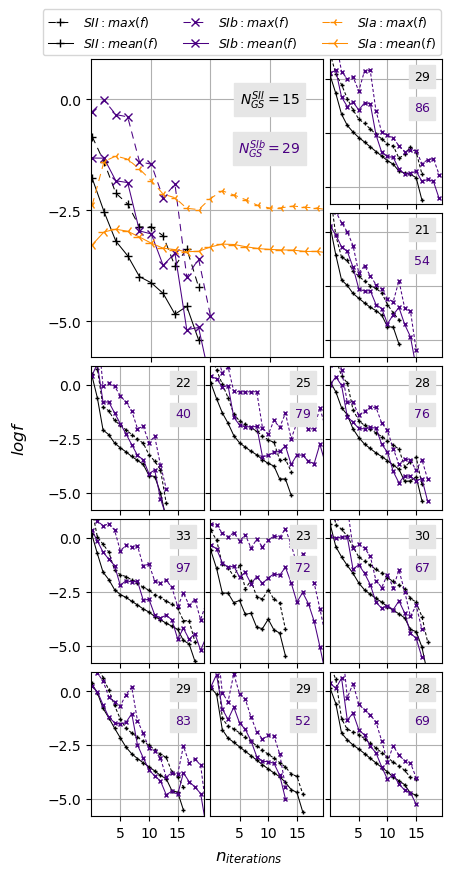

In [300]:
fig = plt.figure(figsize=(4.5, 8.8))
gs = fig.add_gridspec(5, 3, hspace=0.06, wspace=0.06)
axp = {}

ax = fig.add_subplot(gs[0:2, 0:2]) 
kk=1
ax.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:,0]),  ls=(0, (7, 5)), marker='+', lw=.75, color = 'k', label='$SII: max(f)$')
ax.plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:,1]), marker='+', lw=.75, color = 'k', label='$SII: mean(f)$')

ax.plot(np.log10(np.array(n_GS['curr_GS']['tol'][kk][0][0])[:,0]), color = 'indigo',ls=(0, (7, 5)), marker='x', lw=.75, label='$SIb: max(f)$')
ax.plot(np.log10(np.array(n_GS['curr_GS']['tol'][kk][0][0])[:,1]), color = 'indigo', marker='x', lw=.75, label='$SIb: mean(f)$')

ax.plot(np.log10(np.array(n_GS['ceq_GS']['tol'][kk][0][0])[:,0]), color = 'darkorange',ls=(0, (7, 5)), marker='3', lw=.75, label='$SIa: max(f)$')
ax.plot(np.log10(np.array(n_GS['ceq_GS']['tol'][kk][0][0])[:,1]), color = 'darkorange', marker='3',  markersize=8, lw=.75, label='$SIa: mean(f)$')

ax.set_xlim(-0.1,19.5)
ax.set_ylim(-5.8,0.9)
ax.set_xticks([5,10,15])
ax.set_yticks([-5,-2.5,0])
ax.grid()
ax.legend(loc='upper center', bbox_to_anchor=(.65, 1.19),
          ncol=3,  fontsize=9)
plt.setp(ax.get_xticklabels(), visible=False)

ax.text(15, -.0, '$N_{GS}^{SII}=$'+str(n_GS['0']['n'][kk]+len(np.array(n_GS['0']['tol'][kk][0][0]))-2), 
        verticalalignment = 'center', horizontalalignment = 'center', backgroundcolor='0.9')
ax.text(15, -1.1,'$N_{GS}^{SIb}=$'+str(n_GS['curr_GS']['n'][kk]), color='indigo',
        verticalalignment = 'center', horizontalalignment = 'center', backgroundcolor='0.9')


for i in range(15):
    ix = i//3
    iy = i%3
    if ix>1 or iy>1:
        
        
        axp[ix, iy] = fig.add_subplot(gs[ix, iy]) 
        axp[ix, iy].set_xlim(-0.1,19.5)
        axp[ix, iy].set_ylim(-5.8,0.9)
       
        axp[ix, iy].set_xticks([5,10,15])
        axp[ix, iy].set_yticks([-5,-2.5,0])

        axp[ix, iy].grid()

        kk = idxs[i]

        print(kk)
        axp[ix, iy].plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:,0]),  ls=(0, (3, 2)), marker='+',  markersize=3, lw=.75, color = 'k', label='$SII: max(f)$')
        axp[ix, iy].plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:,1]), marker='+', lw=.75, color = 'k',markersize=3, label='$SII: mean(f)$')

        axp[ix, iy].plot(np.log10(np.array(n_GS['curr_GS']['tol'][kk][0][0])[:,0]), color = 'indigo',ls=(0, (3, 2)), marker='x', markersize=3, lw=.75, label='$SIb: max(f)$')
        axp[ix, iy].plot(np.log10(np.array(n_GS['curr_GS']['tol'][kk][0][0])[:,1]), color = 'indigo', marker='x',  markersize=3, lw=.75, label='$SIb: mean(f)$')

        axp[ix, iy].text(16, .1, str(n_GS['0']['n'][kk]+len(np.array(n_GS['0']['tol'][kk][0][0]))-2), 
                verticalalignment = 'center', horizontalalignment = 'center', backgroundcolor='0.9', fontsize=9)
        axp[ix, iy].text(16, -1.35,str(n_GS['curr_GS']['n'][kk]), color='indigo',
                verticalalignment = 'center', horizontalalignment = 'center', backgroundcolor='0.9', fontsize=9)
        

        if ix<4:
            plt.setp(axp[ix, iy].get_xticklabels(), visible=False)
            
        if iy>0:
            plt.setp(axp[ix, iy].get_yticklabels(), visible=False)
        
# fig.supxlabel('$n_{iterations}$')
# fig.supylabel('$log f$')
            
fig.text(0.55, 0.02, '$n_{iterations}$', ha='center', fontsize=12)
fig.text(0.02, 0.5, '$log f$', va='center', rotation='vertical', fontsize=12)

# fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# gs.tight_layout(fig)
gs.update(bottom=0.07)
gs.update(top=.93)
gs.update(left=0.2)
gs.update(right=.98)
plt.savefig('paper/comp_1.pdf')

IndexError: list index out of range

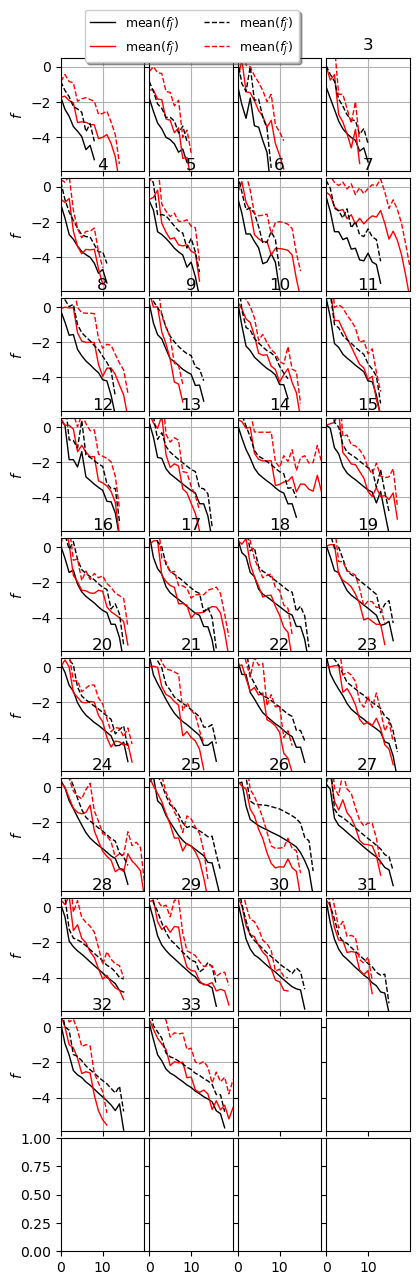

In [234]:
idxs = np.arange(40)
fig = plt.figure(figsize=(4.5,15.5))
gs = fig.add_gridspec(10, 4, hspace=0.06, wspace=0.06)
axs = gs.subplots(sharex='col', sharey='row')

# ax1 = fig.add_subplot(gs[0, 0]) 

for i in range(10):
    
    for j in range(4):
        kk = idxs[i*4+j]
        # axs[i,j].plot(np.log10(n_GS['ceq_GS'][kk][:,0]), 'k--', lw=1, label='$\max(f_{c.eq.})$')
        # axs[i,j].plot(np.log10(n_GS['ceq_GS'][kk][:,1]), 'k-', lw=1, label='$\mathrm{mean}(f_{c.eq.})$')
        # axs[i,j].plot(np.log10(np.array(n_GS['curr_GS']['tol'][kk][0])[:,0]), 'k--', lw=1, label='$\max(f_{\hat J})$')
        # axs[i,j].plot(np.log10(np.array(n_GS['curr_GS']['tol'][kk][0])[:,1]), 'k-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        # axs[i,j].plot(np.log10(np.array(n_GS['ceq_GS']['tol'][kk][0])[:,0]), 'g--', lw=1, label='$\max(f_{\hat J})$')
        # axs[i,j].plot(np.log10(np.array(n_GS['ceq_GS']['tol'][kk][0])[:,1]), 'g-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        # axs[i,j].plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:,0]), 'r--', lw=1, label='$\max(f_{\hat J})$')
        axs[i,j].plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:,1]), 'k-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        axs[i,j].plot(np.log10(np.array(n_GS['curr_GS']['tol'][kk][0][0])[:,1]), 'r-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        axs[i,j].plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:,0]), 'k--', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        axs[i,j].plot(np.log10(np.array(n_GS['curr_GS']['tol'][kk][0][0])[:,0]), 'r--', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        # axs[i,j].plot(np.log10(np.array(n_GS['ceq_GS']['tol'][kk][0][0])[:,1]), 'g-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        # axs[i,j].plot(np.log10(np.array(n_GS['ceq_GS']['tol'][kk][0][0])[:,0]), 'g--', lw=1, label='$\mathrm{mean}(f_{\hat J})$')


        axs[i,j].grid()
        axs[i,j].set_ylim([-5.9, 0.5])
        axs[i,j].set_xlim([0, 19.9])
        
        axs[i,j].set_title(kk)
        if j==0:
            axs[i,j].set_ylabel('$f$')

        if i==2:
            axs[i,j].set_xlabel('$n_{\mathrm{iterations}}$')
            # axs[i,j].xaxis.labelpad=20
            # ax.yaxis.labelpad=20

        if (i,j)==(0,2):
            # axs[i,j].legend(fontsize=9)
            axs[i,j].legend(loc='upper center', bbox_to_anchor=(-.55, 1.48),
          ncol=2, fancybox=True, shadow=True, fontsize=9)
plt.tight_layout()
# plt.savefig('paper/comp_0.pdf',bbox_inches='tight')


In [ ]:
idxs = np.arange(40)
fig = plt.figure(figsize=(4.5,15.5))
gs = fig.add_gridspec(10, 4, hspace=0.06, wspace=0.06)
axs = gs.subplots(sharex='col', sharey='row')
for i in range(10):
    
    for j in range(4):
        kk = idxs[i*4+j]
        # axs[i,j].plot(np.log10(n_GS['ceq_GS'][kk][:,0]), 'k--', lw=1, label='$\max(f_{c.eq.})$')
        # axs[i,j].plot(np.log10(n_GS['ceq_GS'][kk][:,1]), 'k-', lw=1, label='$\mathrm{mean}(f_{c.eq.})$')
        axs[i,j].plot(np.log10(np.array(n_GS['curr_GS']['tol'][kk][0])[:,0]), 'k--', lw=1, label='$\max(f_{\hat J})$')
        axs[i,j].plot(np.log10(np.array(n_GS['curr_GS']['tol'][kk][0])[:,1]), 'k-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        # axs[i,j].plot(np.log10(np.array(n_GS['ceq_GS']['tol'][kk][0])[:,0]), 'g--', lw=1, label='$\max(f_{\hat J})$')
        # axs[i,j].plot(np.log10(np.array(n_GS['ceq_GS']['tol'][kk][0])[:,1]), 'g-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        axs[i,j].plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:,0]), 'r--', lw=1, label='$\max(f_{\hat J})$')
        axs[i,j].plot(np.log10(np.array(n_GS['0']['tol'][kk][0][0])[:,1]), 'r-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        axs[i,j].grid()
        axs[i,j].set_ylim([-6.9, -0.5])
        axs[i,j].set_xlim([0, 19.9])
        
        if j==0:
            axs[i,j].set_ylabel('$f$')

        if i==2:
            axs[i,j].set_xlabel('$n_{\mathrm{iterations}}$')
            # axs[i,j].xaxis.labelpad=20
            # ax.yaxis.labelpad=20

        if (i,j)==(0,2):
            # axs[i,j].legend(fontsize=9)
            axs[i,j].legend(loc='upper center', bbox_to_anchor=(-.55, 1.48),
          ncol=2, fancybox=True, shadow=True, fontsize=9)
plt.tight_layout()
plt.savefig('paper/comp_0.pdf',bbox_inches='tight')


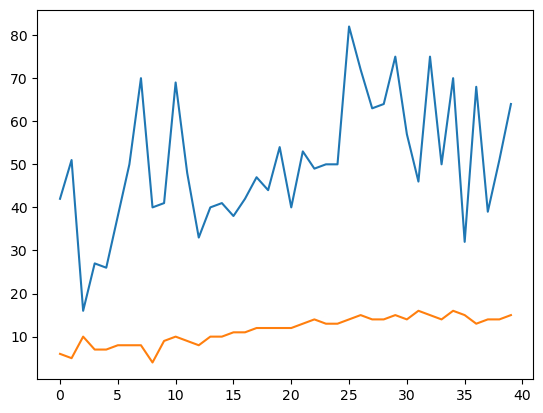

In [100]:
plt.plot(n_GS['curr_GS']['n'])
plt.plot(n_GS['0']['n'])

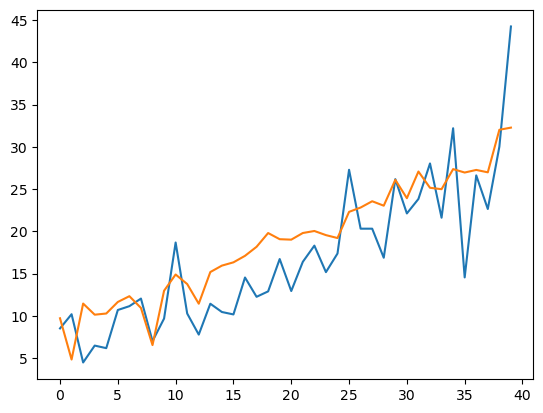

In [99]:
plt.plot(n_GS['curr_GS']['t'])
plt.plot(n_GS['0']['t'])

In [102]:
np.shape(hh[0])

(41, 61)

In [98]:
n_GS['curr_GS']['t']

[8.503762006759644,
 10.183634042739868,
 4.473049163818359,
 6.472141981124878,
 6.168063402175903,
 10.683363914489746,
 11.136505126953125,
 12.03532862663269,
 6.997278213500977,
 9.672349214553833,
 18.669560194015503,
 10.266424894332886,
 7.772013187408447,
 11.426921844482422,
 10.446780920028687,
 10.158129930496216,
 14.52904987335205,
 12.245712995529175,
 12.886839151382446,
 16.714322090148926,
 12.929046869277954,
 16.384175062179565,
 18.301013946533203,
 15.164221048355103,
 17.36884880065918,
 27.27619481086731,
 20.306773900985718,
 20.306828022003174,
 16.868417978286743,
 26.16857385635376,
 22.110536813735962,
 23.82417893409729,
 28.026556968688965,
 21.605895042419434,
 32.1923451423645,
 14.539291143417358,
 26.615123987197876,
 22.63675618171692,
 30.011420011520386,
 44.23662996292114]

In [97]:
n_GS['0']['t']

[9.702837944030762,
 4.822916030883789,
 11.444900274276733,
 10.129073858261108,
 10.267345190048218,
 11.634805917739868,
 12.317767858505249,
 10.927871942520142,
 6.531003952026367,
 12.964020252227783,
 14.88452696800232,
 13.755070209503174,
 11.428047180175781,
 15.175060272216797,
 15.935445070266724,
 16.323827981948853,
 17.094056844711304,
 18.16283416748047,
 19.791393995285034,
 19.06192398071289,
 19.008744955062866,
 19.794307231903076,
 20.034036874771118,
 19.544816255569458,
 19.200443029403687,
 22.297667026519775,
 22.8105731010437,
 23.553512811660767,
 23.028303861618042,
 26.0903000831604,
 23.915771961212158,
 27.070921897888184,
 25.14686918258667,
 24.98179602622986,
 27.357724905014038,
 26.951966047286987,
 27.25950527191162,
 26.976671934127808,
 32.0116810798645,
 32.26666498184204]

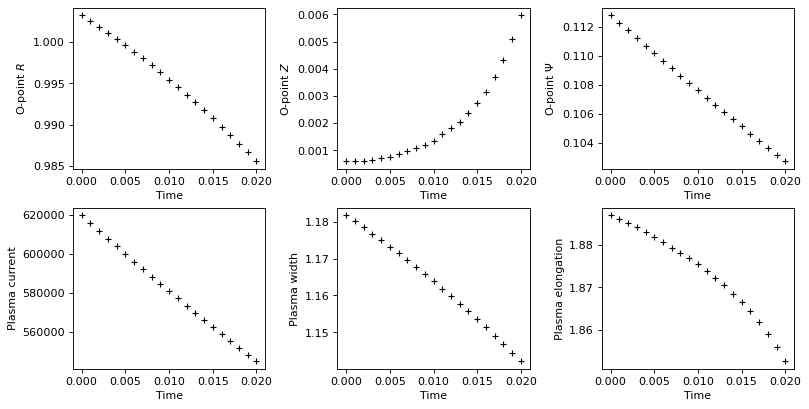

In [31]:
history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

n_GS[key] = {}
n_GS[key]['n'] = ngs
n_GS[key]['t'] = t_per_step
n_GS[key]['tol'] = tol

In [61]:
hh = [history_currents, history_o_points, history_width, history_elongation]

In [62]:
hh_ep = [history_equilibria, history_profiles]

In [63]:
n_GS[key]['all'] = hh

In [74]:
import pickle

In [120]:
pickle.dump(n_GS, open('paper/baseline_ev.pickle', 'wb'))

In [40]:
key = 'curr_GS'

# Example of evolution with constant applied voltages
t = 0
flag = 0
history_times = [t]
t_per_step = []


#use the following to reset stepping.eq1 to a new IC
stepping.initialize_from_ICs(eq, profiles,
                            #  noise_level=0, )

                             noise_vec=stepping.noise_vec,)
                            #  update_linearization=False,
                            #  update_n_steps=12,
                            #  threshold_svd=.15)
# eqs = deepcopy(stepping.eq1)

history_currents = [stepping.currents_vec]
history_equilibria = [deepcopy(stepping.eq1)]
shapes = faster_shape.shapes_f(stepping.eq1, stepping.profiles1)
history_width = [shapes[0]]
history_o_points = shapes[1]
history_elongation = [shapes[2]]
# history_dJs = [stepping.dJ]

counter = 0
max_count = 30
interm_counter = 0
ngs = []
tol = []
while counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    residuals = stepping.nlstepper_currents_only(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.0002,
                                        F_function=stepping.F_function_curr_GS,
                                        # target_relative_tol_GS=.0002,
                                        
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=None,
                                        profile_coefficients=None,
                                        # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                                                    #    1.2*(1+0.0001*np.random.randn())]),

                                        working_relative_tol_GS=.0001,
                                        # target_relative_unexplained_residual=.5,
                                        max_n_directions=3,
                                        max_Arnoldi_iterations=6,
                                        # max_collinearity=.3,
                                        # step_size=.8,
                                        # step_size_curr=.8,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        # blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        # max_no_NK_psi=1.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=2,
                                        linear_only=False)   
    counter_all = np.shape(stepping.record_Iys)[0]
    ngs.append(counter_all - interm_counter)
    stepping.reset_records_for_linearization_update()
    # stepping.run_linearization_update(40, 10, .05)
    interm_counter = np.shape(stepping.record_Iys)[0]
    tol.append([residuals, [stepping.d_plasma_psi_step, stepping.curr_step]])

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq2))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

n_GS[key] = {}
n_GS[key]['n'] = ngs
n_GS[key]['t'] = t_per_step
n_GS[key]['tol'] = tol

'Step: 22/29'

'current time t = 0.022000000000000013'

'current time step dt = 0.001'

starting numerical solve:
max(residual on current eqs) = 16.30018237035176 mean(residual on current eqs) = 0.8228733759475765
This is NK cycle no 0.
['The coeffs applied to the current vec = ', array([1.45859835, 0.4899697 ])]
['The final residual on the current (relative): max =', 7.456135014172113, 'mean =', 0.5343925467229365]
This is NK cycle no 1.
['The coeffs applied to the current vec = ', array([-1.36538118, -0.28321519, -0.41910651])]
['The final residual on the current (relative): max =', 9.715442490262754, 'mean =', 0.7352853786743875]
This is NK cycle no 2.
['The coeffs applied to the current vec = ', array([0.29308035, 0.13385399])]
['The final residual on the current (relative): max =', 12.779829889412978, 'mean =', 0.8726115685486565]
This is NK cycle no 3.
['The coeffs applied to the current vec = ', array([-0.06819103, -0.02820867])]
['The final residual on the current (relative): max =', 6.82957851542144, 'mean =', 0.6902921834665239]
This is NK cycle no 4.
['The coef

KeyboardInterrupt: 

In [127]:
n_GS['0_s_1']

{'n': [13],
 't': [5.7034080028533936],
 'tol': [[[[0.015532953418625602, 0.0033715744766342594],
    [0.01318659139399592, 0.0013290436197376672],
    [0.0032317286502470295, 0.00036164512448674774],
    [0.0007428406570401133, 6.885864492058976e-05],
    [0.0010198147753878223, 7.702044120048033e-05],
    [0.0035346571507395936, 0.00027086176841162167],
    [0.0004289882897418256, 5.070193248831946e-05],
    [0.00032748589903002493, 3.341117469704526e-05],
    [0.0005246195077125442, 4.683502268332261e-05],
    [0.0027598828701994203, 0.00021095624726391466],
    [0.00013858537837908248, 2.398629845215571e-05],
    [0.0002569249240870718, 2.659174649368768e-05],
    [0.0004911665784339217, 3.881291774291769e-05],
    [0.0023009307122920557, 0.00016964618589685533],
    [0.00045327551332319965, 2.821565706847564e-05],
    [1.9670421915393383e-05, 1.2943394274421768e-06]],
   [0.0014184798784278394,
    array([1.71037402, 0.38469596, 0.08790329, 0.01666987, 0.03410346,
           0.290

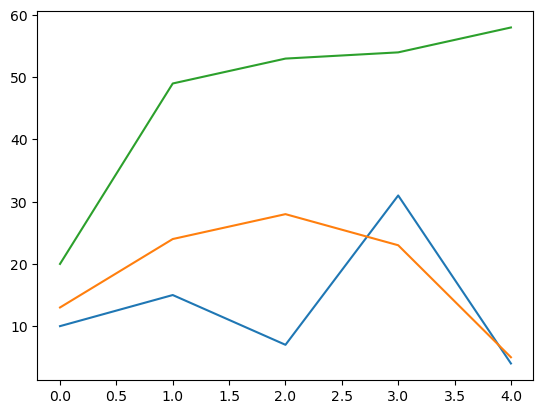

In [117]:
plt.plot(n_GS['0_s']['n'])
plt.plot(n_GS['0_s_1']['n'])
plt.plot(n_GS['s_curr_GS']['n'])
# plt.plot(n_GS['0_w_2']['n'])
# plt.plot(n_GS['0_w_3']['n'])

# plt.plot(n_GS['curr_GS']['n'])

In [28]:
n_GS['0']['t'][:-28]

[2.240746021270752, 1.3947629928588867]

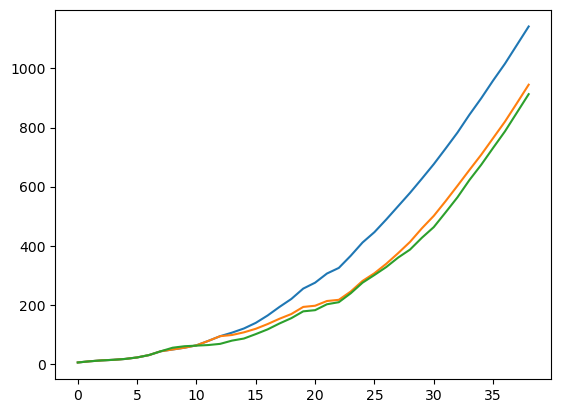

In [59]:
plt.plot([np.sum(n_GS['0']['n'][:i]) for i in np.arange(-39,0)])
plt.plot([np.sum(n_GS['0_w']['n'][:i]) for i in np.arange(-39,0)])
plt.plot([np.sum(n_GS['0_w_1']['n'][:i]) for i in np.arange(-39,0)])
# plt.plot([np.sum(n_GS['0_w_2']['n'][:i]) for i in np.arange(-30,0)])

# plt.plot(n_GS['curr_GS']['n'])

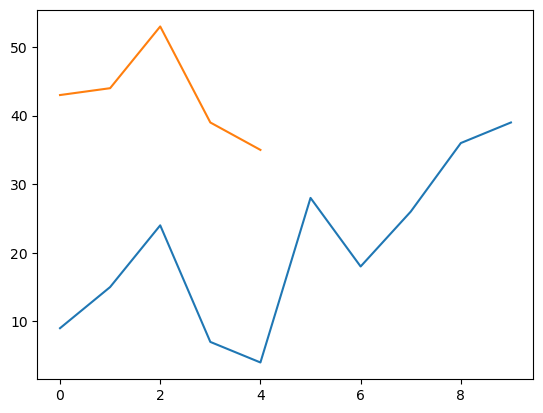

In [88]:
plt.plot(n_GS['0_s']['n'])
plt.plot(n_GS['s_curr_GS']['n'])

In [34]:
# n_GS = {}

# key = 'ceq_GS'
# n_GS[key] = []

# key = 'curr_GS'
# n_GS[key] = []

# key = '0'
# n_GS[key] = []

max_count = 1

for k in np.arange(2):
    print(k)

    # Initialize the evolution object
    # This uses the starting equilibrium to get all the geometric constraints/grids etc
    stepping = nonlinear_solve.nl_solver(profiles=profiles, eq=eq, 
                                        max_mode_frequency=10**2.4, 
                                        full_timestep=1e-3, 
                                        max_internal_timestep=1,
                                        plasma_resistivity=1e-6,
                                        dIydI = dIydI,
                                        dIydpars = dIydpars,
                                        plasma_domain_mask=None,
                                        automatic_timestep=False,#(1/10, 1/10),
                                        mode_removal=False,
                                        min_dIy_dI=1,
                                        nbroad=1,
                                        verbose=True
                                        )

    # In absence of a policy, this calculates the active voltages U_active
    # to maintain the currents needed for the equilibrium statically
    U_active = (stepping.vessel_currents_vec*stepping.evol_metal_curr.R)[:stepping.evol_metal_curr.n_active_coils]

    key = 'ceq_GS'
    # Example of evolution with constant applied voltages
    t = 0
    flag = 0
    history_times = [t]
    t_per_step = []
    #use the following to reset stepping.eq1 to a new IC
    stepping.initialize_from_ICs(eq, profiles,
                                 noise_level=10,)
    counter = 0
    while counter<max_count:
        clear_output(wait=True)
        display(f'Step: {counter}/{max_count-1}')
        display(f'current time t = {t}')
        display(f'current time step dt = {stepping.dt_step}')
        residuals = stepping.nlstepper_currents_only(active_voltage_vec=U_active, 
                                                    target_relative_tol_currents=.0001,
                                                    F_function=stepping.F_function_ceq_GS,
                                                    profile_parameter=None,
                                                    profile_coefficients=None,
                                                    working_relative_tol_GS=.00003,
                                                    # target_relative_unexplained_residual=.5,
                                                    max_n_directions=3,
                                                    max_Arnoldi_iterations=6,
                                                    verbose=2,
                                                    max_solving_iterations=20,
                                                    linear_only=False)     
        
        counter += 1
    n_GS[key].append(np.array(residuals))


    key = 'curr_GS'
    # Example of evolution with constant applied voltages
    t = 0
    flag = 0
    history_times = [t]
    t_per_step = []
    #use the following to reset stepping.eq1 to a new IC
    stepping.initialize_from_ICs(eq, profiles,
                                 noise_vec=stepping.noise_vec, )
    counter = 0
    while counter<max_count:
        clear_output(wait=True)
        display(f'Step: {counter}/{max_count-1}')
        display(f'current time t = {t}')
        display(f'current time step dt = {stepping.dt_step}')
        residuals = stepping.nlstepper_currents_only(active_voltage_vec=U_active, 
                                            target_relative_tol_currents=.00001,
                                            F_function=stepping.F_function_curr_GS,
                                            profile_parameter=None,
                                            profile_coefficients=None,
                                            working_relative_tol_GS=.00003,
                                            # target_relative_unexplained_residual=.5,
                                            max_n_directions=3,
                                            max_Arnoldi_iterations=6,
                                            verbose=2,
                                            max_solving_iterations=20,
                                            linear_only=False)     
        
        counter += 1
    n_GS[key].append(np.array(residuals))




    key = '0'
    # Example of evolution with constant applied voltages
    t = 0
    flag = 0
    history_times = [t]
    t_per_step = []
    #use the following to reset stepping.eq1 to a new IC
    stepping.initialize_from_ICs(eq, profiles,
                                noise_vec=stepping.noise_vec, )
    counter = 0
    while counter<max_count:
        clear_output(wait=True)
        display(f'Step: {counter}/{max_count-1}')
        display(f'current time t = {t}')
        display(f'current time step dt = {stepping.dt_step}')
        residuals = stepping.nlstepper(active_voltage_vec=U_active, 
                                            target_relative_tol_currents=.00001,
                                            target_relative_tol_GS=.0001,
                                            # F_function=stepping.F_function_curr_GS,
                                            profile_parameter=None,
                                            profile_coefficients=None,
                                            working_relative_tol_GS=.00003,
                                            # target_relative_unexplained_residual=.5,
                                            max_n_directions=3,
                                            max_Arnoldi_iterations=6,
                                            verbose=2,
                                            max_no_NK_psi=0,
                                            # max_solving_iterations=30,
                                            linear_only=False)     
        
        counter += 1
    n_GS[key].append(np.array(residuals))



'Step: 0/0'

'current time t = 0'

'current time step dt = 0.001'

starting numerical solve:
max(residual on current eqs) = 1.3179164656582378 mean(residual on current eqs) = 0.10623487771851522
This is NK cycle no 0.
[['The coefficients applied to psi are', array([0.22153403])]]
['The intermediate residuals on the current: max =', 2.1515138655379493, 'mean =', 0.14263097016832496]
['The coeffs applied to the current vec = ', array([1.12649845])]
['The final residual on the current (relative): max =', 0.2120625282978395, 'mean =', 0.015437110177450275]
['Residuals on GS eq (relative): ', 0.01814551230367619]
This is NK cycle no 1.
[['The coefficients applied to psi are', array([-0.03831469, -0.33106274])]]
['The intermediate residuals on the current: max =', 2.425353899590277, 'mean =', 0.13044543328648373]
['The coeffs applied to the current vec = ', array([0.99587102])]
['The final residual on the current (relative): max =', 0.024176995907767722, 'mean =', 0.0031288626893311525]
['Residuals on GS eq (relative): ', 0.01760590989521311]
This is NK cyc

In [166]:
import pickle

In [229]:
pickle.dump(n_GS, open("paper/ceq_vs_curr_residuals.pk", "wb"))
print(stepping.curr_step)

[ 1.21251223  0.84887449  0.64090423  1.0885772   0.69151256  0.37938573
  0.58270595  0.40200772  0.31730552  0.60698854  2.29971327  0.29264761
  4.58726001  0.46896395  3.44142625  7.22519177  7.40342288  3.1100306
  4.42624058 11.85619966  3.27734287  9.37629887  1.81890347  2.22150798
 10.96189704  7.1417471 ]


IndexError: list index out of range

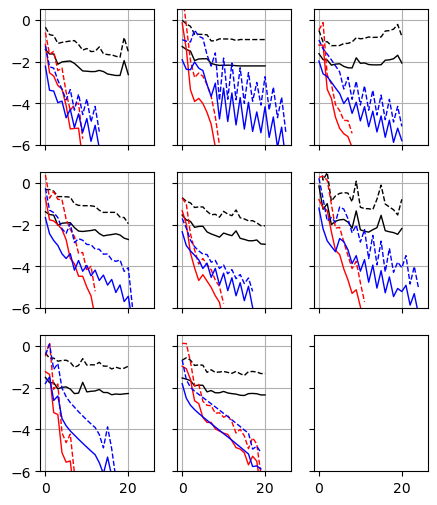

In [36]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(5, 6))

for i in range(3):
    for j in range(3):
        axs[i,j].plot(np.log10(n_GS['ceq_GS'][i*3+j+7][:,0]), 'k--', lw=1, label='F')
        axs[i,j].plot(np.log10(n_GS['ceq_GS'][i*3+j+7][:,1]), 'k-', lw=1, label='F')
        axs[i,j].plot(np.log10(n_GS['curr_GS'][i*3+j+7][:,0]), 'r--', lw=1, label='F')
        axs[i,j].plot(np.log10(n_GS['curr_GS'][i*3+j+7][:,1]), 'r-', lw=1, label='F')
        axs[i,j].plot(np.log10(n_GS['0'][i*3+j+7][:,0]), 'b--', lw=1, label='F')
        axs[i,j].plot(np.log10(n_GS['0'][i*3+j+7][:,1]), 'b-', lw=1, label='F')
        axs[i,j].grid()
        axs[i,j].set_ylim([-6, 0.5])
        

plt.tight_layout()



/var/folders/n4/g0m7y66n7qj77q_n9txgrcmh0000gq/T/ipykernel_2105/1498225698.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


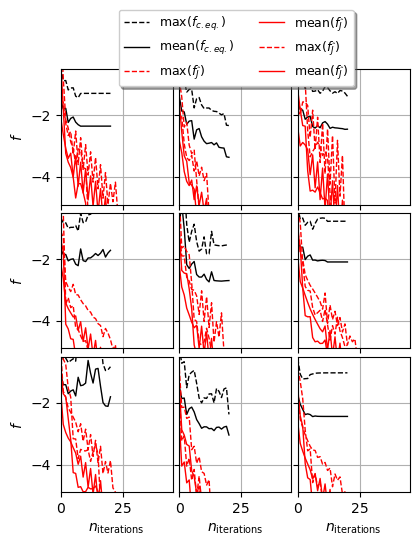

In [29]:
idxs = [0,1,2,3,9,5,7,8,12]
fig = plt.figure(figsize=(4.5,5.5))
gs = fig.add_gridspec(3, 3, hspace=0.06, wspace=0.06)
axs = gs.subplots(sharex='col', sharey='row')
for i in range(3):
    
    for j in range(3):
        kk = idxs[i*3+j]
        axs[i,j].plot(np.log10(n_GS['ceq_GS'][kk][:,0]), 'k--', lw=1, label='$\max(f_{c.eq.})$')
        axs[i,j].plot(np.log10(n_GS['ceq_GS'][kk][:,1]), 'k-', lw=1, label='$\mathrm{mean}(f_{c.eq.})$')
        axs[i,j].plot(np.log10(n_GS['curr_GS'][kk][:,0]), 'r--', lw=1, label='$\max(f_{\hat J})$')
        axs[i,j].plot(np.log10(n_GS['curr_GS'][kk][:,1]), 'r-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        axs[i,j].plot(np.log10(n_GS['0'][kk][:,0]), 'r--', lw=1, label='$\max(f_{\hat J})$')
        axs[i,j].plot(np.log10(n_GS['0'][kk][:,1]), 'r-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        axs[i,j].grid()
        axs[i,j].set_ylim([-4.9, -0.5])
        axs[i,j].set_xlim([0, 45.])
        
        if j==0:
            axs[i,j].set_ylabel('$f$')

        if i==2:
            axs[i,j].set_xlabel('$n_{\mathrm{iterations}}$')
            # axs[i,j].xaxis.labelpad=20
            # ax.yaxis.labelpad=20

        if (i,j)==(0,2):
            # axs[i,j].legend(fontsize=9)
            axs[i,j].legend(loc='upper center', bbox_to_anchor=(-.55, 1.48),
          ncol=2, fancybox=True, shadow=True, fontsize=9)
plt.tight_layout()
plt.savefig('paper/comp_0.pdf',bbox_inches='tight')


In [346]:
n_GS = {}

key = '0'
n_GS[key] = {}
n_GS[key][0] = []
n_GS[key][1] = []

key = 'curr_GS'
n_GS[key] = {}
n_GS[key][0] = []
n_GS[key][1] = []

max_count = 1

for k in np.arange(3):
    print(k)


    key = 'curr_GS'
    # Example of evolution with constant applied voltages
    t = 0
    flag = 0
    history_times = [t]
    t_per_step = []
    #use the following to reset stepping.eq1 to a new IC
    stepping.initialize_from_ICs(eq, profiles,
                                 noise_level=10)
    counter = 0
    while counter<max_count:
        clear_output(wait=True)
        print(key)
        display(f'Step: {counter}/{max_count-1}')
        display(f'current time t = {t}')
        display(f'current time step dt = {stepping.dt_step}')
        t_start = time.time()
        residuals = stepping.nlstepper_currents_only(active_voltage_vec=U_active, 
                                                    target_relative_tol_currents=.0001,
                                                    F_function=stepping.F_function_curr_GS,
                                                    profile_parameter=None,
                                                    profile_coefficients=None,
                                                    working_relative_tol_GS=.00002,
                                                    max_n_directions=3,
                                                    max_Arnoldi_iterations=6,
                                                    verbose=0,
                                                    linear_only=False)     
        t_end = time.time()
        counter += 1
    n_GS[key][0].append(np.array(residuals))
    n_GS[key][1].append([np.shape(stepping.record_Iys)[0], t_end-t_start])



    key = '0'
    
    # Example of evolution with constant applied voltages
    t = 0
    flag = 0
    history_times = [t]
    t_per_step = []
    #use the following to reset stepping.eq1 to a new IC
    stepping.initialize_from_ICs(eq, profiles,
                                 noise_vec=stepping.noise_vec, )
    counter = 0
    while counter<max_count:
        clear_output(wait=True)
        print(key)
        display(f'Step: {counter}/{max_count-1}')
        display(f'current time t = {t}')
        display(f'current time step dt = {stepping.dt_step}')
        t_start = time.time()
        residuals = stepping.nlstepper(active_voltage_vec=U_active, 
                                            target_relative_tol_currents=.0001,
                                            target_relative_tol_GS=.0001,
                                            profile_parameter=None,
                                            profile_coefficients=None,
                                            working_relative_tol_GS=.00002,
                                            max_n_directions=3,
                                            max_Arnoldi_iterations=4,
                                            blend_GS=.5,
                                            max_no_NK_psi=1.,
                                            verbose=0,
                                            linear_only=False)   
        t_end = time.time()
        counter += 1
    n_GS[key][0].append(np.array(residuals))
    n_GS[key][1].append([np.shape(stepping.record_Iys)[0], t_end-t_start])


key = 'curr_GS'
n_GS[key][1] = np.array(n_GS[key][1])
key = '0'
n_GS[key][1] = np.array(n_GS[key][1])


0


'Step: 0/0'

'current time t = 0'

'current time step dt = 0.003'

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

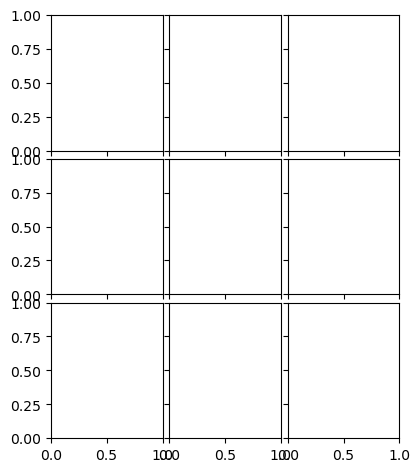

In [33]:
idxs = np.arange(9)
fig = plt.figure(figsize=(4.5,5.5))
gs = fig.add_gridspec(3, 3, hspace=0.06, wspace=0.06)
axs = gs.subplots(sharex='col', sharey='row')
for i in range(3):
    
    for j in range(3):
        kk = idxs[i*3+j]
        axs[i,j].plot(np.log10(n_GS['0'][0][kk][:,0]), 'k--', lw=1, label='$\max(f_{c.eq.})$')
        axs[i,j].plot(np.log10(n_GS['0'][0][kk][:,1]), 'k-', lw=1, label='$\mathrm{mean}(f_{c.eq.})$')
        axs[i,j].plot(np.log10(n_GS['curr_GS'][0][kk][:,0]), 'r--', lw=1, label='$\max(f_{\hat J})$')
        axs[i,j].plot(np.log10(n_GS['curr_GS'][0][kk][:,1]), 'r-', lw=1, label='$\mathrm{mean}(f_{\hat J})$')
        axs[i,j].grid()
        axs[i,j].set_ylim([-4.9, -0.5])
        axs[i,j].set_xlim([0, 45.])
        
        if j==0:
            axs[i,j].set_ylabel('$f$')

        if i==2:
            axs[i,j].set_xlabel('$n_{\mathrm{iterations}}$')
            # axs[i,j].xaxis.labelpad=20
            # ax.yaxis.labelpad=20

        if (i,j)==(0,2):
            # axs[i,j].legend(fontsize=9)
            axs[i,j].legend(loc='upper center', bbox_to_anchor=(-.55, 1.48),
          ncol=2, fancybox=True, shadow=True, fontsize=9)
plt.tight_layout()
plt.savefig('paper/comp_0.pdf',bbox_inches='tight')


In [348]:
n_GS['0'][1]

array([[13.        , 10.06773877],
       [13.        ,  8.21577597],
       [11.        ,  4.80127907]])

In [349]:
n_GS['curr_GS'][1]

array([[22.        ,  4.20754504],
       [40.        ,  6.69329619],
       [45.        ,  3.15883899]])

In [324]:
np.shape(stepping.record_Iys)

(23, 3051)

In [320]:
key = 'f_1'

# Example of evolution with constant applied voltages
t = 0
flag = 0
history_times = [t]
t_per_step = []


#use the following to reset stepping.eq1 to a new IC
stepping.initialize_from_ICs(eq, profiles,
                             noise_level=0, )

                            #  noise_vec=stepping.noise_vec,)
                            #  update_linearization=False,
                            #  update_n_steps=12,
                            #  threshold_svd=.15)
# eqs = deepcopy(stepping.eq1)

history_currents = [stepping.currents_vec]
history_equilibria = [deepcopy(stepping.eq1)]
shapes = faster_shape.shapes_f(stepping.eq1, stepping.profiles1)
history_width = [shapes[0]]
history_o_points = shapes[1]
history_elongation = [shapes[2]]
# history_dJs = [stepping.dJ]

counter = 0
max_count = 1
interm_counter = 0
ngs = []
tol = []
while counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    residuals = stepping.nlstepper_currents_psiplasma(active_voltage_vec=U_active, 
                                                     target_relative_tol_currents=.0002,
                                                     F_function=stepping.F_function_1,
                                                     target_relative_tol_GS=.0002,
                                                     # profile parameters are being jittered around at random 
                                                     profile_parameter=None,
                                                     profile_coefficients=None,
                                                     # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                                     # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                                                                #    1.2*(1+0.0001*np.random.randn())]),
                                                     working_relative_tol_GS=.00005,
                                                     target_relative_unexplained_residual=.1,
                                                     max_n_directions=360,
                                                     max_Arnoldi_iterations=360,
                                                     # max_collinearity=.3,
                                                     step_size=1,
                                                     verbose=2,
                                                     linear_only=False)   
    counter_all = np.shape(stepping.record_Iys)[0]
    ngs.append(counter_all - interm_counter)
    stepping.reset_records_for_linearization_update()
    # stepping.run_linearization_update(40, 10, .05)
    interm_counter = np.shape(stepping.record_Iys)[0]
    tol.append([residuals, [stepping.d_plasma_psi_step, stepping.curr_step]])

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq2))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

n_GS[key] = {}
n_GS[key]['n'] = ngs
n_GS[key]['t'] = t_per_step
n_GS[key]['tol'] = tol

'Step: 0/0'

'current time t = 0'

'current time step dt = 0.003'

starting numerical solve:
max(relative residual on current eqs) = 0.1690002305908111 mean(relative residual on current eqs) = 0.02828261695672833
max(relative residual on GS eqs) = 7.325999536949317e-08
self.full_nk_solver.nR0 0.0006096786864948019
self.full_nk_solver.relative_unexplained_residual 0.9977159503083253
This is NK cycle no 0.
['The coeffs applied to the full vec = ', array([0.0063608 , 0.03408059, 0.08331217])]
['The final residual on the current (relative): max =', 0.15685503865859987, 'mean =', 0.027289267418052564]
['The final residual on GS (relative): max =', 5.061353303062876e-05]
self.full_nk_solver.nR0 0.0006083252007421998
self.full_nk_solver.relative_unexplained_residual 0.9975131109517238
This is NK cycle no 1.
['The coeffs applied to the full vec = ', array([-0.00058972, -0.38546891, -0.01186591])]
['The final residual on the current (relative): max =', 0.15625002344500175, 'mean =', 0.026890239866432988]
['The final residual on GS (relative): max =', 9.9903489

KeyboardInterrupt: 

In [306]:
residuals

[[0.1566042992935765, 0.02728147303823327, 5.3515211219991765e-05],
 [0.15622965962270374, 0.027160788438995092, 9.205780445562816e-05],
 [0.15622702383157133, 0.02715995138016601, 9.239041773559487e-05],
 [0.15622700580518814, 0.027159945592908467, 9.239272664821215e-05],
 [0.15622700534735592, 0.027159945532844492, 9.239274506074856e-05],
 [0.15622700547316715, 0.027159945542678778, 9.239274358188453e-05],
 [0.15622700550657728, 0.027159945543209385, 9.239274344075497e-05],
 [0.15622700550657728, 0.027159945542228427, 9.239274462714188e-05],
 [0.15622700552067256, 0.027159945546098227, 9.239274368532624e-05],
 [0.15622700552067256, 0.027159945546146494, 9.239274342170422e-05],
 [0.1562270053614512, 0.02715994553397933, 9.239274504191508e-05],
 [0.15622700544236678, 0.02715994553826079, 9.239274409064967e-05],
 [0.15622700543975698, 0.027159945539083852, 9.239274361968016e-05],
 [0.15622700543975698, 0.02715994553936652, 9.239274363854667e-05],
 [0.15622700542305193, 0.027159945539893

In [41]:
history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


Text(0, 0.5, 'Plasma elongation')

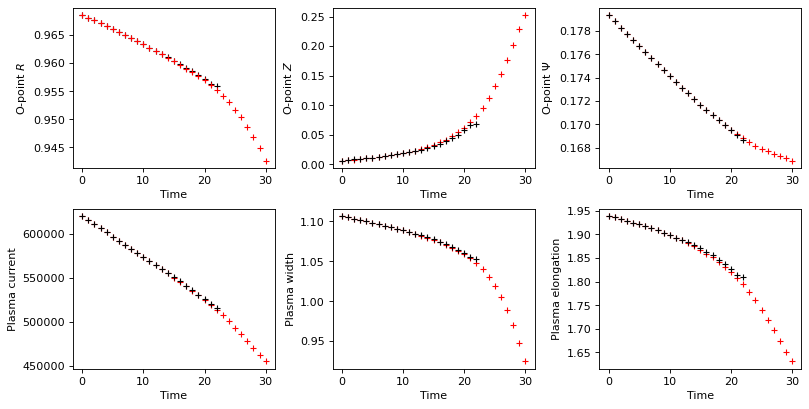

In [43]:
# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot( history_o_points[:, 0],'k+')
axs_flat[0].plot( hh[1][:, 0],'r+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot( hh[1][:, 1],'r+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot( hh[1][:, 2],'r+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot( hh[0][:,-1]*stepping.plasma_norm_factor,'r+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot( hh[2],'r+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot( hh[3],'r+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')


axs_flat[1].plot( history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot( history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot( history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot( history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot( history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')



In [49]:
np.shape(history_currents)

(23, 37)

/var/folders/n4/g0m7y66n7qj77q_n9txgrcmh0000gq/T/ipykernel_2105/1446790096.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


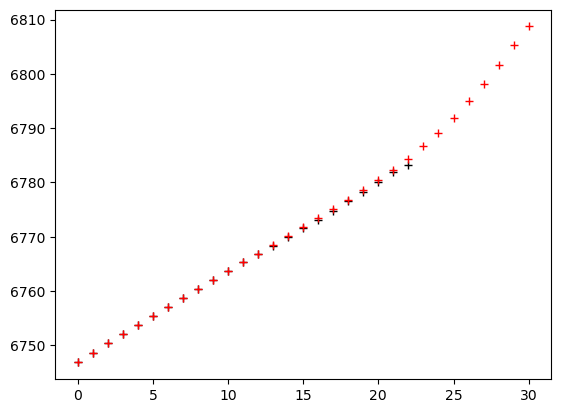

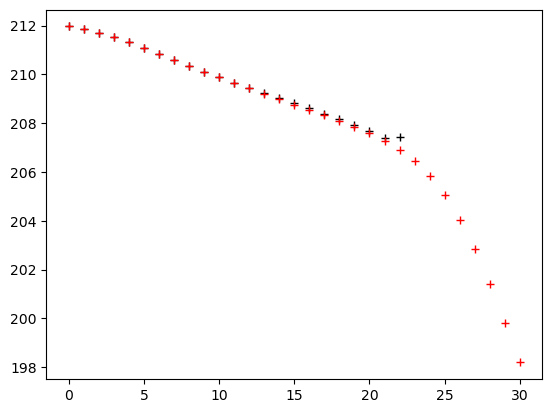

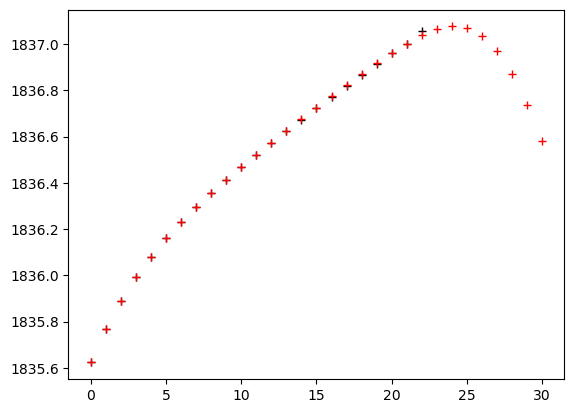

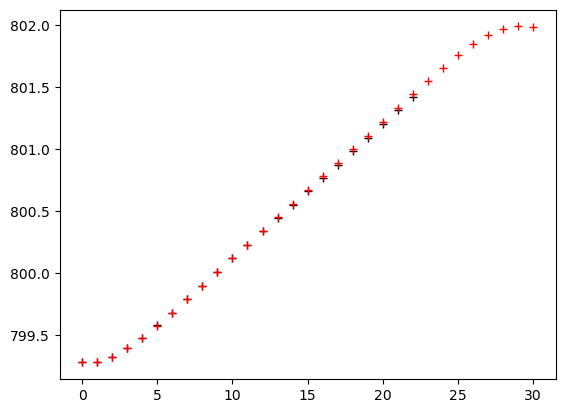

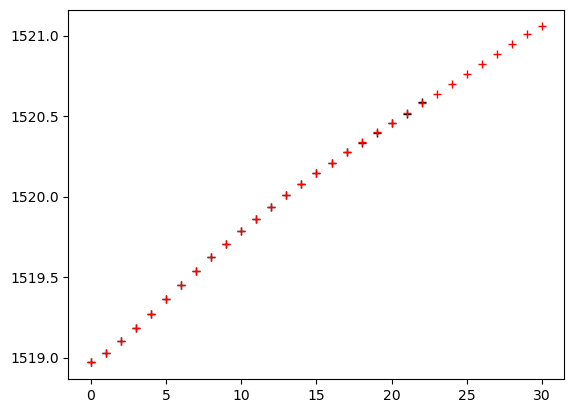

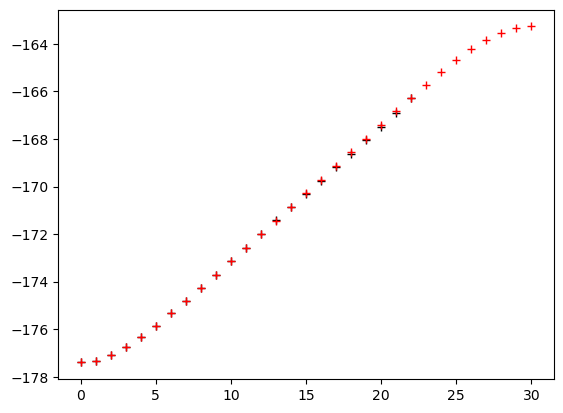

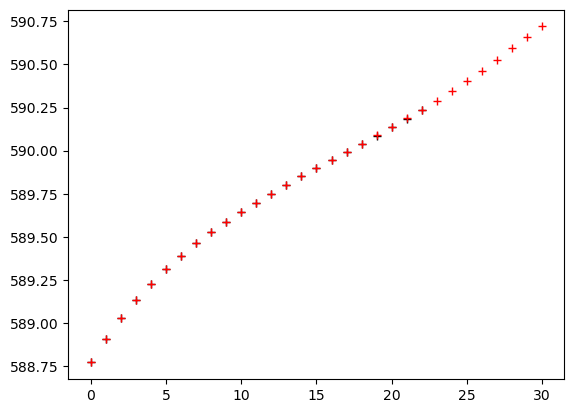

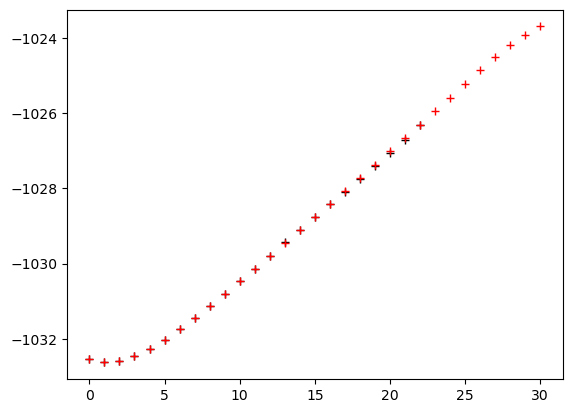

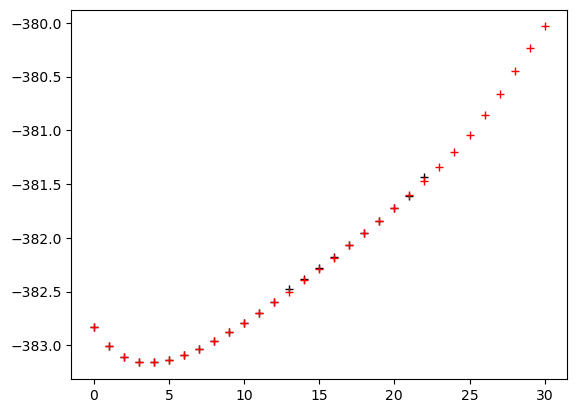

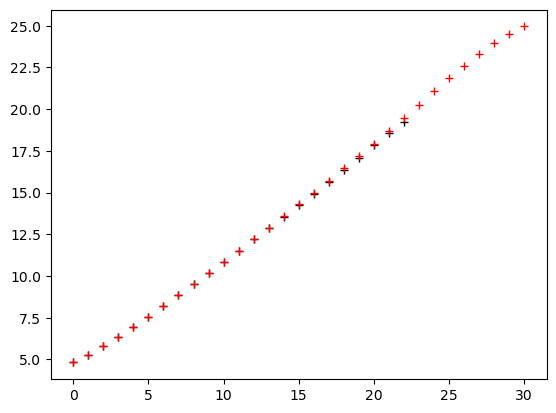

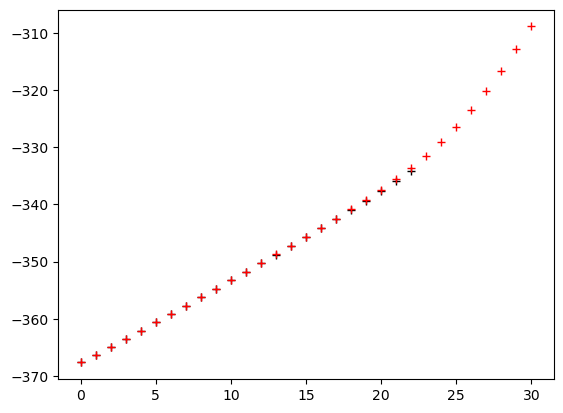

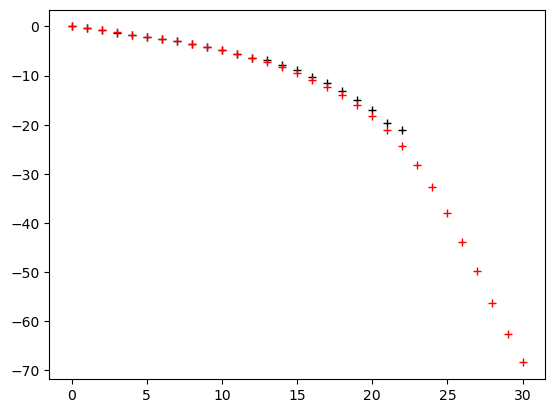

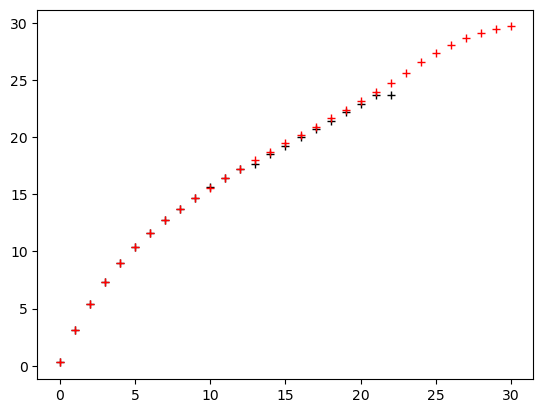

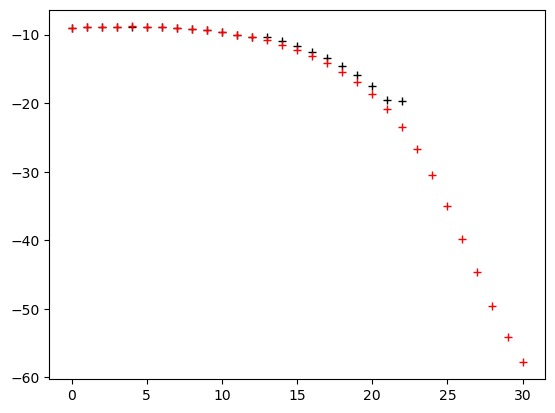

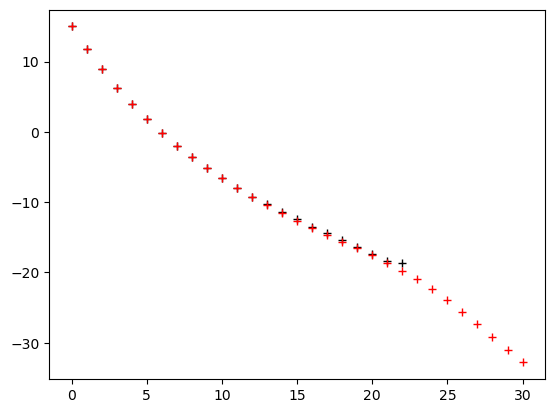

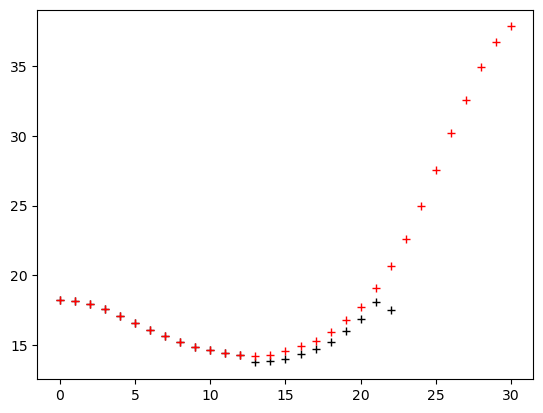

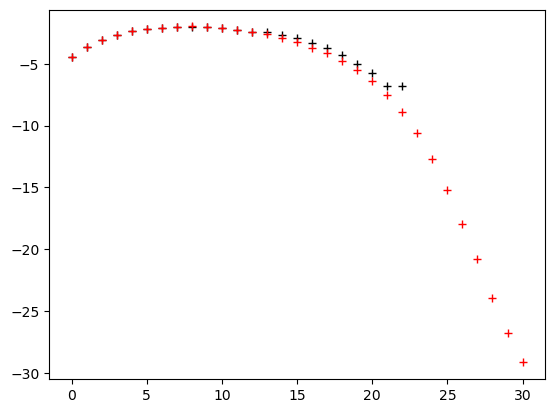

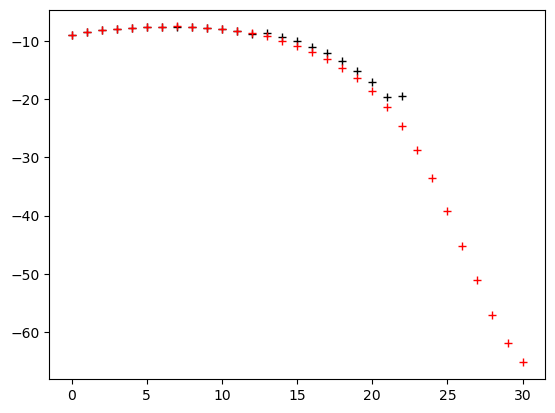

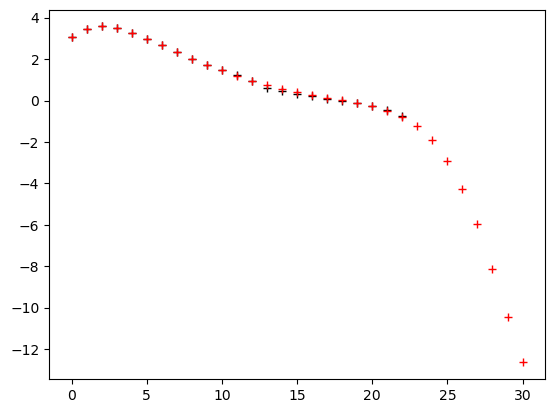

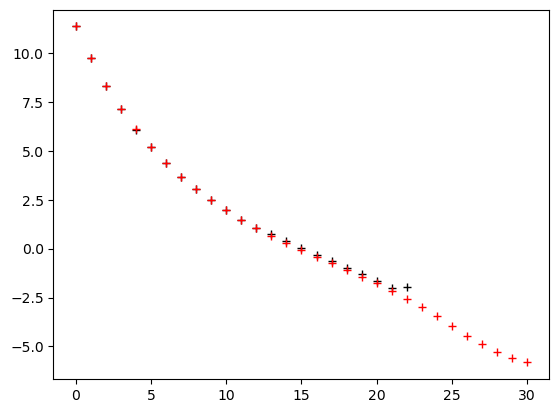

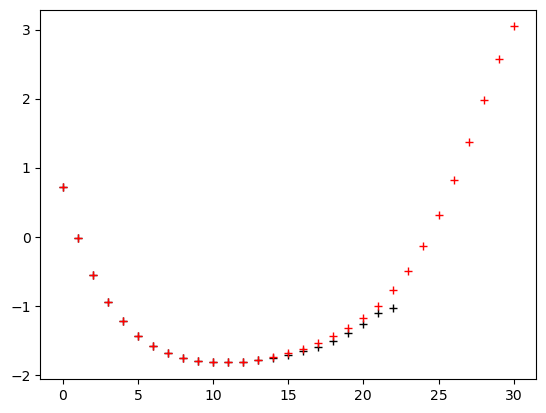

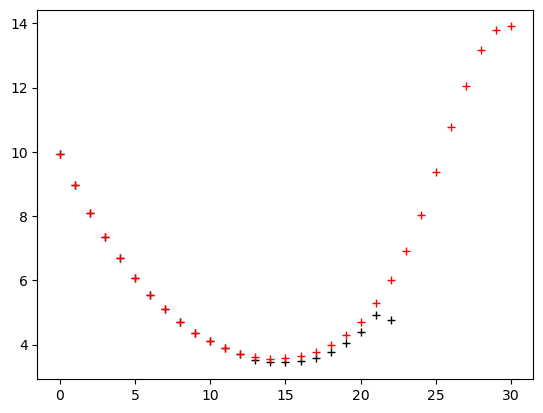

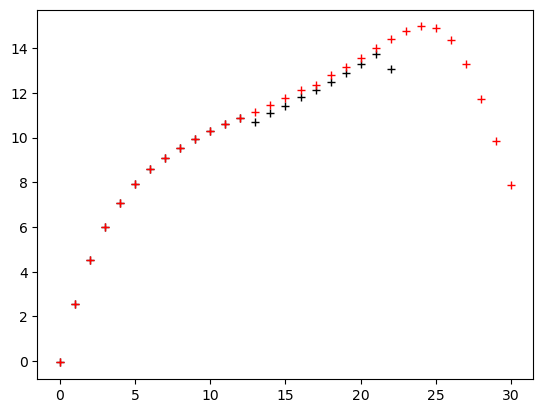

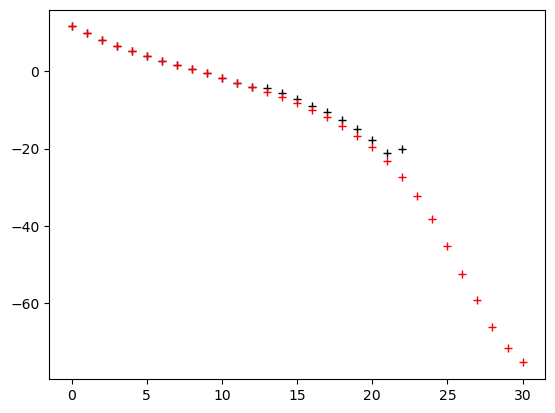

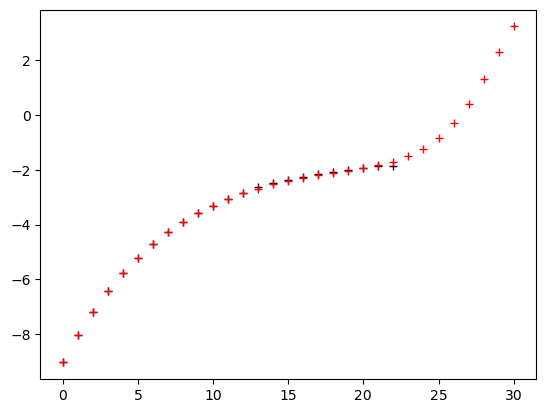

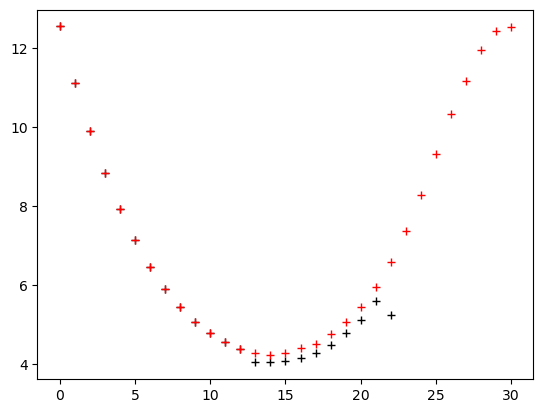

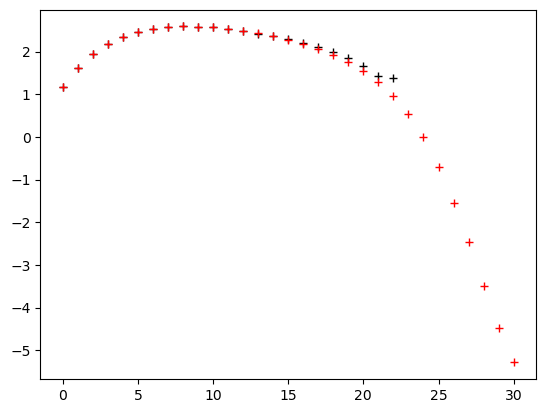

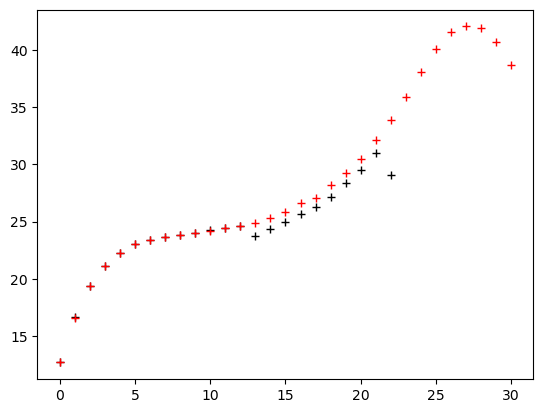

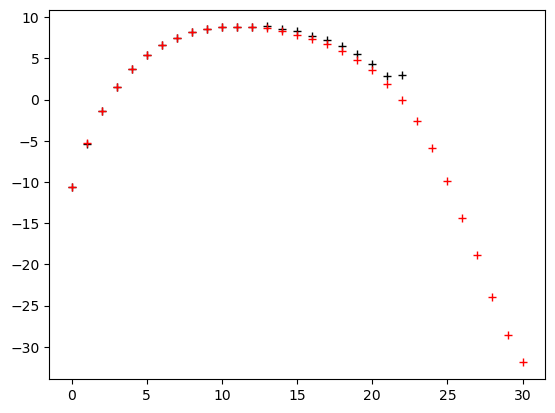

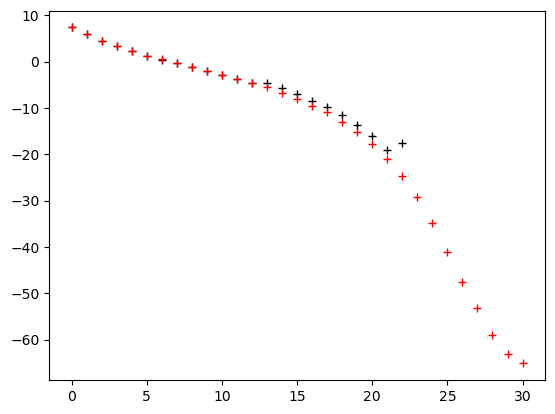

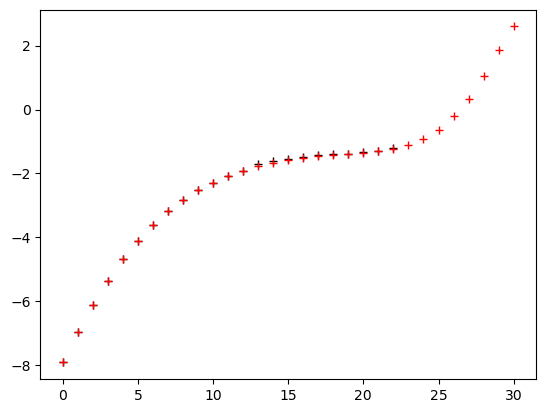

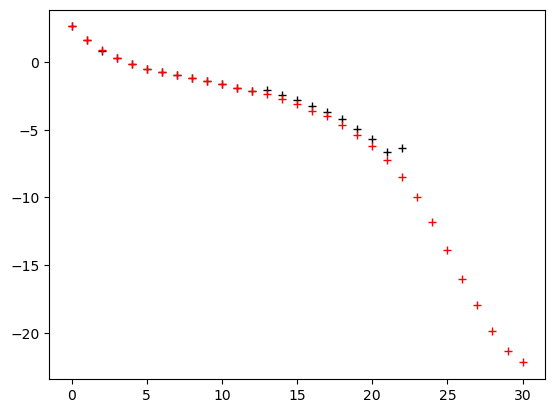

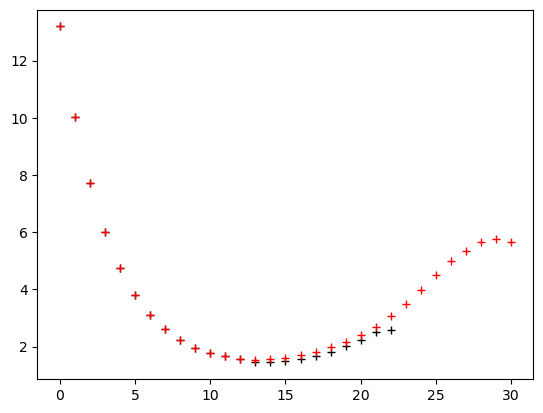

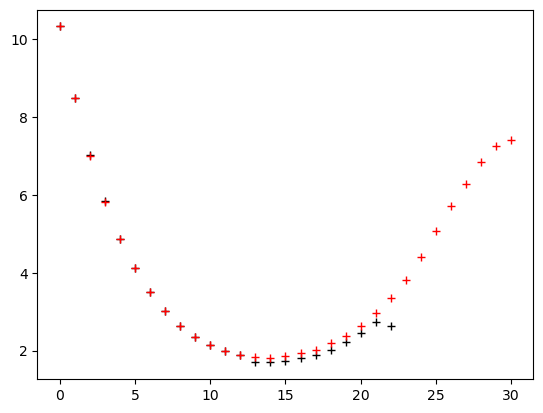

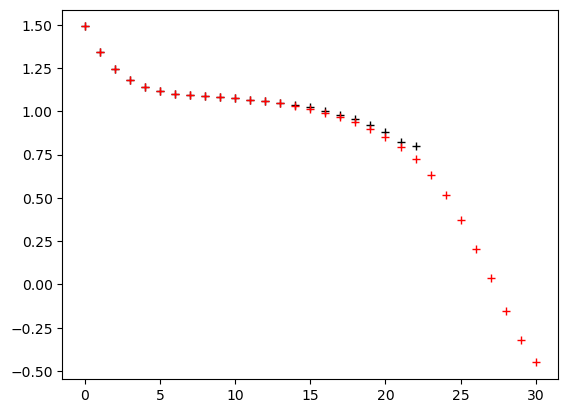

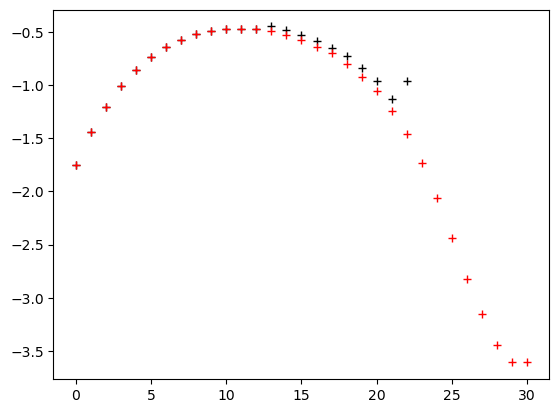

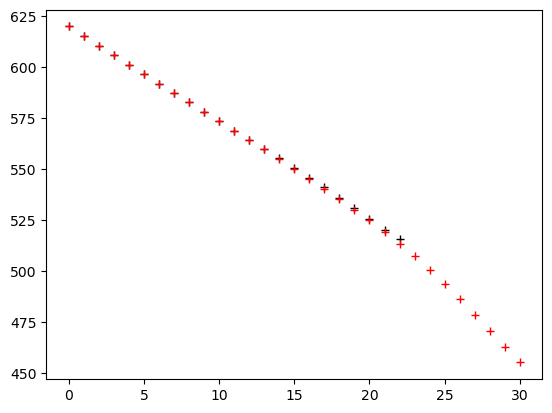

In [50]:
for i in np.arange(37):
    plt.figure()
    plt.plot(history_currents[:,i],'k+')
    plt.plot(hh[0][:,i],'r+')

In [143]:
np.array(n_GS['s_ceq_GS']['tol'][0][0])[:,0]

array([8.94366637e-01, 2.51366777e+00, 1.42360447e+01, 4.33637850e+00,
       7.88973999e-02, 2.89045175e-02, 3.42642586e-02, 2.24442897e-02,
       2.77661422e-02, 4.39577589e-02, 1.41741521e-02, 1.00797147e-02,
       1.00372395e-02, 1.00766920e-02, 1.02309314e-02, 1.03403292e-02,
       1.04399256e-02, 9.99571471e-03, 9.48056365e-03, 1.02676195e-02,
       1.07334337e-02, 1.08772632e-02, 1.22695613e-02, 1.26198061e-02,
       1.53110119e-02, 1.55401877e-02, 1.79014339e-02, 6.16601519e-02,
       2.31684201e-02, 2.58114953e-02, 2.57742094e-02, 2.71498903e-02,
       2.85111686e-02, 3.52964657e-02, 3.91686622e-02, 3.99902468e-02,
       4.31184383e-02, 4.40131883e-02, 4.88704703e-02, 5.05752486e-02,
       5.85718915e-02, 6.00940982e-02, 7.41414867e-02, 7.58958974e-02,
       1.19810177e-01, 1.24409818e-01, 2.80414290e-01, 3.03704660e-01,
       1.59357446e+00, 1.11333873e+00])

In [92]:
stepping.d_plasma_psi_step

0.0031843336938167793

In [97]:
key = 'ceq_GS'

# Example of evolution with constant applied voltages
t = 0
flag = 0
history_times = [t]
t_per_step = []


#use the following to reset stepping.eq1 to a new IC
stepping.initialize_from_ICs(eq, profiles,
                             noise_vec=stepping.noise_vec,
                            )
                            #  noise_level=.001, 
                            #  noise_vec=None,
                            #  update_linearization=False,
                            #  update_n_steps=12,
                            #  threshold_svd=.15)
# eqs = deepcopy(stepping.eq1)

history_currents = [stepping.currents_vec]
history_equilibria = [deepcopy(stepping.eq1)]
shapes = faster_shape.shapes_f(stepping.eq1, stepping.profiles1)
history_width = [shapes[0]]
history_o_points = shapes[1]
history_elongation = [shapes[2]]
# history_dJs = [stepping.dJ]

counter = 0
max_count = 1
ngs = []
while counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    stepping.nlstepper_currents_only(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.0002,
                                        F_function=stepping.F_function_ceq_GS,
                                        # target_relative_tol_GS=.001,
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=None,
                                        profile_coefficients=None,
                                        # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                                                    #    1.2*(1+0.0001*np.random.randn())]),
                                        working_relative_tol_GS=.0001,
                                        # target_relative_unexplained_residual=.5,
                                        max_n_directions=6,
                                        max_Arnoldi_iterations=10,
                                        # max_collinearity=.3,
                                        # step_size=.8,
                                        # step_size_curr=.8,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        # blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        # max_no_NK_psi=2.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=2,
                                        linear_only=False)     
    ngs.append(np.shape(stepping.record_Iys)[0])
    stepping.reset_records_for_linearization_update()
    # stepping.run_linearization_update(160, 100, .08)

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq2))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

n_GS[key] = {}
n_GS[key]['n'] = ngs
n_GS[key]['t'] = t_per_step

'Step: 0/4'

'current time t = 0'

'current time step dt = 0.003'

starting numerical solve:
max(residual on current eqs) = 1.2226671529553297 mean(residual on current eqs) = 0.11280248141078168
This is NK cycle no 0.
['The coeffs applied to the current vec = ', array([-0.28690763])]
['The final residual on the current (relative): max =', 0.8924689700627966, 'mean =', 0.07150466988371824]
This is NK cycle no 1.
['The coeffs applied to the current vec = ', array([-1.16421044])]
['The final residual on the current (relative): max =', 0.4930290994917528, 'mean =', 0.04549249843140401]
This is NK cycle no 2.
['The coeffs applied to the current vec = ', array([-0.46835807])]
['The final residual on the current (relative): max =', 0.4136652572650912, 'mean =', 0.02400759319136419]
This is NK cycle no 3.
['The coeffs applied to the current vec = ', array([-0.31982964])]
['The final residual on the current (relative): max =', 0.37609746677745864, 'mean =', 0.02685944734691035]
This is NK cycle no 4.
['The coeffs applied to the current vec = ', array([-3.76672

KeyboardInterrupt: 

In [36]:
n_GS[key] = {}
n_GS[key]['n'] = ngs
n_GS[key]['t'] = t_per_step

n_GS[key]['t']

[2.8937489986419678,
 3.5603950023651123,
 3.066276788711548,
 4.557464122772217,
 3.7764110565185547,
 10.360827922821045,
 3.3570899963378906,
 16.704138040542603]

In [ ]:
max_count = 14
while counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    stepping.nlstepper(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.0005,
                                        # F_function=stepping.F_function_ceq_GS,
                                        target_relative_tol_GS=.0005,
                                        
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=None,
                                        profile_coefficients=None,
                                        # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                                                    #    1.2*(1+0.0001*np.random.randn())]),

                                        working_relative_tol_GS=.0001,
                                        # target_relative_unexplained_residual=.5,
                                        # max_n_directions=3,
                                        # max_Arnoldi_iterations=3,
                                        # max_collinearity=.3,
                                        # step_size=.8,
                                        # step_size_curr=.8,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        max_no_NK_psi=2.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=2,
                                        linear_only=False)    
    stepping.run_linearization_update(min_records=25)

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq2))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

'Step: 13/13'

'current time t = 0.006500000000000002'

'current time step dt = 0.0005'

starting numerical solve:
max(residual on current eqs) = 0.01934830901725374 mean(residual on current eqs) = 0.004570345498729397
This is NK cycle no 0.
['NK on psi has been skipped 1 times. The residual on psi is 0.00000231.']
['The intermediate residuals on the current: max =', 0.01934830901725374, 'mean =', 0.004570345498729397]
['The coeffs applied to the current vec = ', array([1.15470563])]
['The final residual on the current (relative): max =', 0.002939127381093213, 'mean =', 0.0006673712932758985]
['The final residual on the current (relative): max =', 0.0002558632454891987, 'mean =', -0.00035810195409145243]
['Residuals on GS eq (relative): ', 0.002537594100690945]
This is NK cycle no 1.
['NK on psi has been skipped 2 times. The residual on psi is 0.00000053.']
['The intermediate residuals on the current: max =', 0.017525769238400202, 'mean =', 0.0038795622975972273]
['The coeffs applied to the current vec = ', array([1.00350602])]
['The final residual on the current (relative

Text(0.5, 1.0, 't=0.04000000000000003')

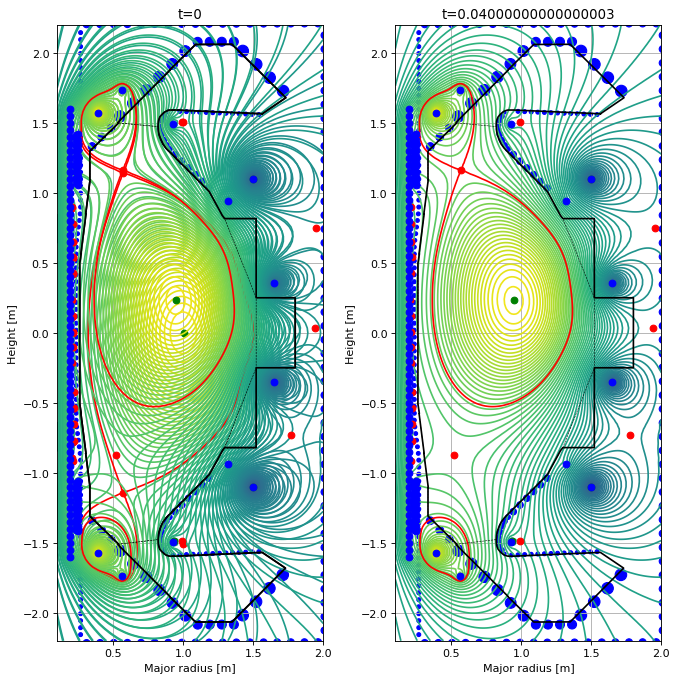

In [60]:
# Plot equilibria at last simulated time
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(121)
ax.grid(True,which='both')
history_equilibria[0].plot(axis=ax,show=False)
history_equilibria[-1].plot(axis=ax,show=False)

eq.tokamak.plot(axis=ax,show=False)
ax.set_title('t=0')
ax = fig.add_subplot(122)
ax.grid(True,which='both')
history_equilibria[-1].plot(axis=ax,show=False)
eq.tokamak.plot(axis=ax,show=False)
ax.set_title('t='+str(t))

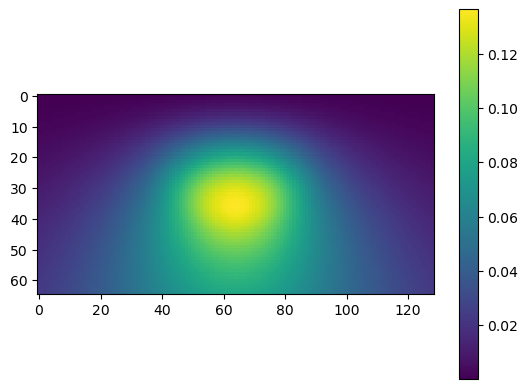

In [10]:
plt.imshow(eq.plasma_psi)
plt.colorbar()

In [ ]:
eq.psi_func(R)

In [ ]:
np.sum(stepping.record_Iys>0, axis=0)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.shape(stepping.record_currents_pars)

(111, 28)

In [ ]:
stepping.linearised_sol.find_linearization_update(stepping.record_currents_pars, 
                                                  stepping.record_Iys,
                                                  10*stepping.reg_matrix)
# stepping.linearised_sol.apply_linearization_update()

In [ ]:
np.shape(stepping.linearised_sol.jacobian_update)

(1734, 28)

In [ ]:
jacobian_update_full = np.zeros_like(stepping.linearised_sol.dIydall_full)
jacobian_update_full[stepping.linearised_sol.mask_Iy,:] = stepping.linearised_sol.jacobian_update
stepping.linearised_sol.dIydall_full += jacobian_update_full

In [ ]:
from scipy.linalg import solve_sylvester

In [ ]:
stepping.linearised_sol.find_linearization_update(stepping.record_currents_pars,
                                                     stepping.record_Iys,
                                                     100*stepping.reg_matrix)
                                                  

In [ ]:
stepping.linearised_sol.assign_from_dIydall()

In [ ]:
stepping.reset_records_for_linearization_update()

In [ ]:
stepping.make_broad_hatIy(stepping.hatIy)
stepping.linearised_sol.set_linearization_point(stepping.linearised_sol.dIydI,
                                                stepping.linearised_sol.dIydpars,
                                                stepping.broad_hatIy)

In [ ]:
Iy_mask = np.sum(stepping.record_Iys>0, axis=0)>0

In [ ]:
np.shape(stepping.record_Iys[:,Iy_mask])

(22, 1734)

In [ ]:
np.std(stepping.record_Iys,axis=0)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
np.shape(stepping.linearised_sol.dIydI)

(3051, 25)

In [ ]:
stepping.record_Iys

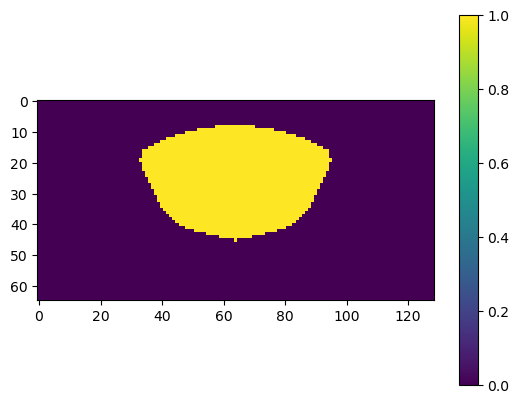

In [ ]:
plt.imshow(stepping.plasma_grids.rebuild_map2d(np.sum(stepping.record_Iys>0, axis=0)))
plt.colorbar()

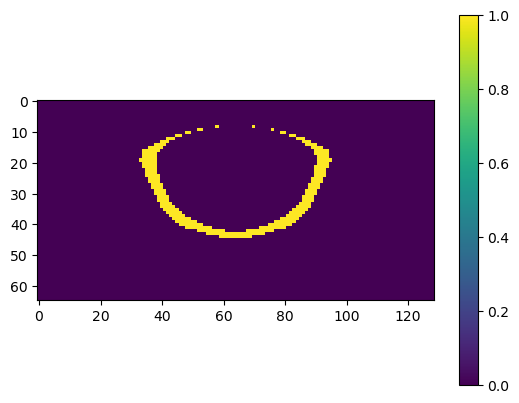

In [ ]:
plt.imshow(stepping.plasma_grids.rebuild_map2d((np.std(stepping.record_Iys, axis=0)/(np.mean(stepping.record_Iys,axis=0)+.1)))>.05)
plt.colorbar()

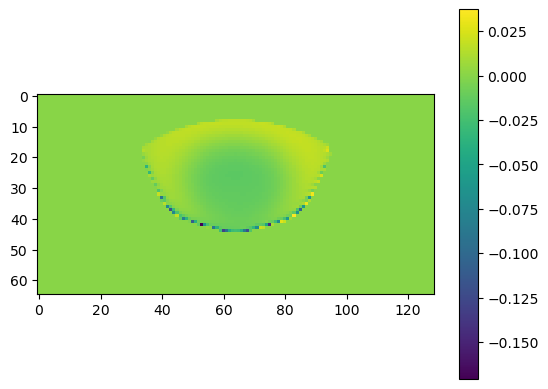

In [ ]:
plt.imshow(stepping.plasma_grids.rebuild_map2d(stepping.linearised_sol.jacobian_update_full[:,11]))
plt.colorbar()

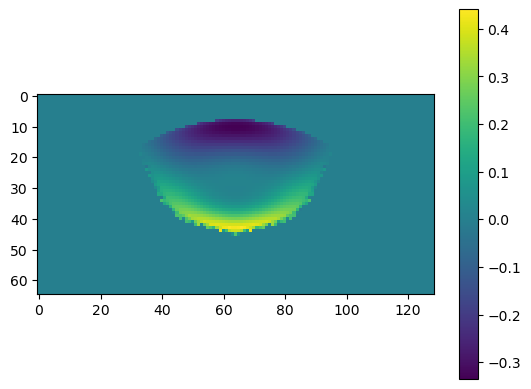

In [ ]:
plt.imshow(stepping.plasma_grids.rebuild_map2d(stepping.linearised_sol.dIydall_full[:,3]))
plt.colorbar()

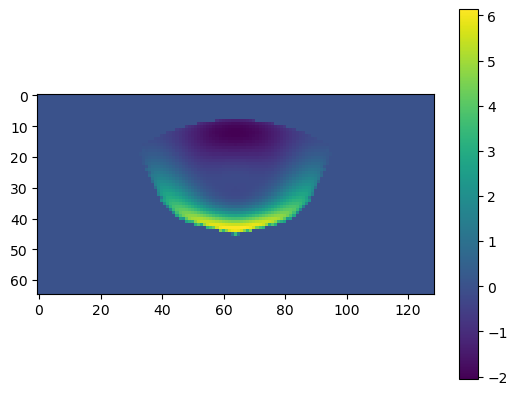

In [ ]:
idx=24
plt.imshow(stepping.plasma_grids.rebuild_map2d(stepping.linearised_sol.dIydall_full[:,idx]+stepping.linearised_sol.jacobian_update_full[:,idx]))
plt.colorbar()

In [ ]:
np.sum(stepping.eq2._profiles.jtor>0)

1731

In [ ]:
np.shape(stepping.linearised_sol.dIy)

(3051, 91)

In [ ]:
np.shape(stepping.linearised_sol.dIydall@stepping.linearised_sol.dv)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 91 is different from 28)

In [ ]:
np.shape(stepping.linearised_sol.dd)

(91, 3051)

In [ ]:
np.shape(stepping.linearised_sol.dv@(stepping.linearised_sol.dv.T))

(91, 91)

In [ ]:
np.shape(stepping.linearised_sol.dIy)

(105, 3051)

In [ ]:
gg = eq.tokamak.createPsiGreens(eq.R, eq.Z)

In [ ]:
np.shape(stepping.record_currents_pars)

(15, 29)

In [ ]:
gg['PX']

{'PX1': array([[1.99934876e-10, 2.06065292e-10, 2.12448847e-10, ...,
         1.06578010e-08, 9.55253520e-09, 8.59361227e-09],
        [3.35975358e-10, 3.46270941e-10, 3.56991332e-10, ...,
         1.77127666e-08, 1.58885002e-08, 1.43038844e-08],
        [5.06847110e-10, 5.22367269e-10, 5.38527200e-10, ...,
         2.63551424e-08, 2.36641524e-08, 2.13231889e-08],
        ...,
        [4.96939529e-08, 5.08419610e-08, 5.20226095e-08, ...,
         3.09929970e-07, 3.03620529e-07, 2.97298298e-07],
        [5.06565760e-08, 5.18179686e-08, 5.30120386e-08, ...,
         3.07712016e-07, 3.01600023e-07, 2.95470463e-07],
        [5.16100075e-08, 5.27842405e-08, 5.39911650e-08, ...,
         3.05483547e-07, 2.99561965e-07, 2.93618511e-07]]),
 'PX2': array([[8.59361227e-09, 9.55253520e-09, 1.06578010e-08, ...,
         2.12448847e-10, 2.06065292e-10, 1.99934876e-10],
        [1.43038844e-08, 1.58885002e-08, 1.77127666e-08, ...,
         3.56991332e-10, 3.46270941e-10, 3.35975358e-10],
        [2.

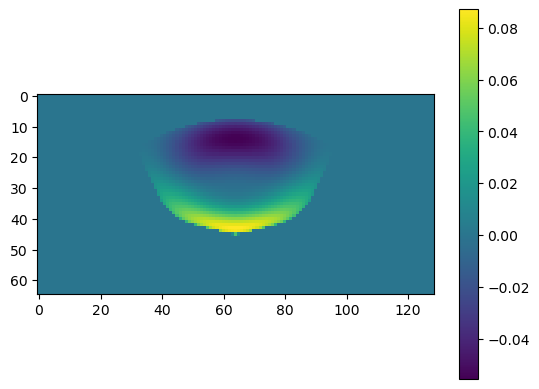

In [ ]:
plt.imshow(stepping.plasma_grids.rebuild_map2d(stepping.dIydpars[:,2]))
plt.colorbar()

In [ ]:
aa = np.empty((1,10))
np.vstack((aa, np.ones(10)))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
stepping.final_dI_record

array([ 2.71826566,  1.49047571,  1.39792693,  1.35565861,  1.2133193 ,
        0.57060892,  0.55317884,  0.43575446,  0.40728273,  0.11601437,
        0.06398564,  0.12677061,  0.45777985,  0.8287991 ,  0.91812026,
        2.61875532,  3.67135206,  1.39195773,  6.68641162, 10.        ,
       10.        , 10.        ,  4.60839341,  2.26033036, 10.        ,
       10.        , 10.        ,  3.03893089,  2.81999124,  2.38775353,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
        4.62356371,  0.11924267])

In [ ]:
stepping.dIydpars = None
stepping.dIydI = None
stepping.build_linearization(eq, profiles, verbose=True, dIydpars=0)

I'm building the linearization wrt the currents. This may take a minute or two.
dimension 0 in the vector of metal currents, gradient calculated on the finite difference: norm(deltaI) =  0.6135177475386991 , norm(deltaIy) = 7.743947564099732
dimension 1 in the vector of metal currents, gradient calculated on the finite difference: norm(deltaI) =  0.3875058142232968 , norm(deltaIy) = 12.220006891078885
dimension 2 in the vector of metal currents, gradient calculated on the finite difference: norm(deltaI) =  0.374664764835036 , norm(deltaIy) = 12.483603140335566
dimension 3 in the vector of metal currents, gradient calculated on the finite difference: norm(deltaI) =  0.3687815788090774 , norm(deltaIy) = 12.605435966627486
dimension 4 in the vector of metal currents, gradient calculated on the finite difference: norm(deltaI) =  0.3558214193919229 , norm(deltaIy) = 12.864947958511888
dimension 5 in the vector of metal currents, gradient calculated on the finite difference: norm(deltaI) =  

In [ ]:
print(stepping.profiles2.alpha_m, stepping.profiles2.alpha_n, stepping.profiles2.profile_parameter)

1.8

In [ ]:
stepping.final_dpars_record

array([1.00765793e-05, 1.00442606e-05, 7.03369499e+00])

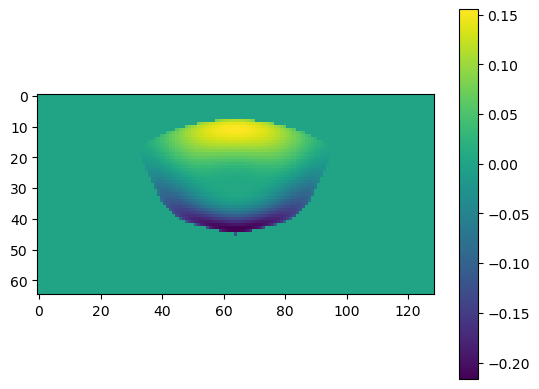

In [ ]:
plt.imshow(stepping.plasma_grids.rebuild_map2d(stepping.linearised_sol.dIydI[:,0]))
plt.colorbar()

In [ ]:
from scipy.linalg import solve_sylvester


In [ ]:
solve_sylvester(a=np.random.random(size=(5,5)),
                b=np.random.random(size=(3,3)),
                q=np.random.random(size=(5,3)))

array([[ 0.15935551,  0.54925164, -0.40943894],
       [-0.446218  ,  1.47002678, -0.86100908],
       [-0.47949433,  1.98840615, -0.65528008],
       [-0.20265069,  0.58837005,  0.4744853 ],
       [ 1.1854425 , -2.729659  ,  1.58046689]])

In [ ]:
R1v = -np.triu(np.tril(np.ones((8385, 8385)), k=0), k=0)
R1v += np.triu(np.tril(np.ones((8385, 8385)), k=65), k=65)


array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
aa = np.arange(5*4).reshape(5,4)
aa


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [ ]:
aa[:, np.array([0,1,1,0],dtype=bool)][np.array([0,0,1,1,0],dtype=bool),:]


array([[ 9, 10],
       [13, 14]])

In [ ]:
aa = np.triu(np.tril(np.ones((9,9)), k=1),k=1) - np.triu(np.tril(np.ones((6,9)), k=0),k=0)
aa.T@aa

array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
np.arange(8385).reshape(65,129)

array([[   0,    1,    2, ...,  126,  127,  128],
       [ 129,  130,  131, ...,  255,  256,  257],
       [ 258,  259,  260, ...,  384,  385,  386],
       ...,
       [7998, 7999, 8000, ..., 8124, 8125, 8126],
       [8127, 8128, 8129, ..., 8253, 8254, 8255],
       [8256, 8257, 8258, ..., 8382, 8383, 8384]])

In [ ]:
eq._profiles.plasma_grids.Iy_from_jtor(np.arange(8385).reshape(65,129))

array([0.83681641, 0.83783691, 0.83885742, ..., 7.57420898, 7.57522949,
       7.57625   ])

In [ ]:
np.shape(eq._profiles.jtor)

(65, 129)

In [ ]:
mask = np.tril(np.ones((4, 4)))[:,:,np.newaxis]

In [ ]:
aa.reshape(-1,5)[ii[0]*4+ii[1]]

array([[20, 21, 22, 23, 24],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49],
       [60, 61, 62, 63, 64],
       [65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74]])

In [ ]:
stepping.plasma_grids.plasma_domain_mask.reshape(-1)

array([False, False, False, ..., False, False, False])

In [ ]:
aa[:,:,0]

array([[ 0,  5, 10, 15],
       [20, 25, 30, 35],
       [40, 45, 50, 55],
       [60, 65, 70, 75]])

In [ ]:
ii = np.tril_indices(4,k=-1)

In [ ]:
ii[0]*4+ii[1]

array([ 4,  8,  9, 12, 13, 14])

In [ ]:
bb[np.tril_indices(4,k=-1)]

array([ 4,  8,  9, 12, 13, 14])

In [ ]:
bb = np.arange(16).reshape(4,4)
bb

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
stepping.build_dIydI_j(1, 1e-8)

array([nan, nan, nan, ..., nan, nan, nan])

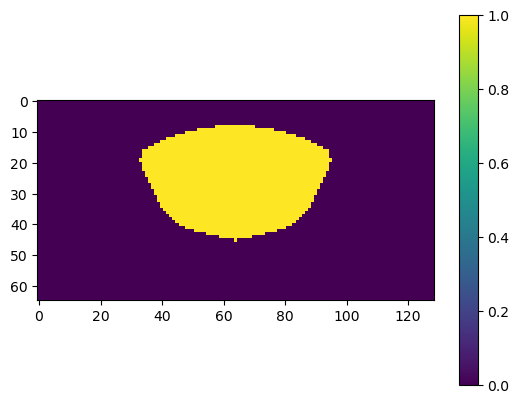

In [ ]:
plt.imshow(stepping.plasma_grids.rebuild_map2d(stepping.Iy))
plt.colorbar()


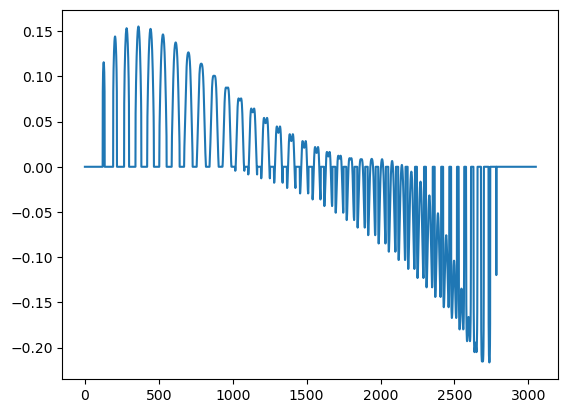

In [ ]:
plt.plot(stepping.dIydI[:,0])

In [ ]:
stepping.plasma_grids.idxs_mask

array([[ 6,  6,  6, ..., 57, 57, 57],
       [46, 47, 48, ..., 69, 70, 71]])

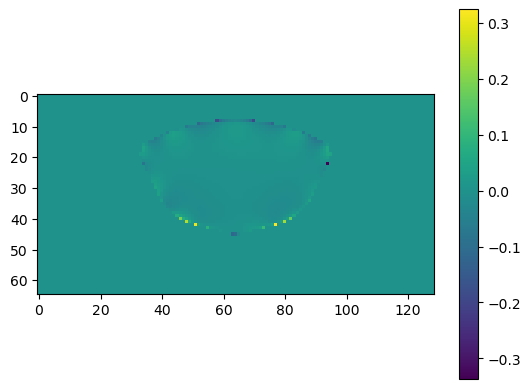

In [ ]:
plt.imshow(stepping.plasma_grids.rebuild_map2d(pca.components_[22]))
plt.colorbar()

In [ ]:
# Example of evolution with constant applied voltages
t = 0
flag = 0
history_times = [t]
t_per_step = []


#use the following to reset stepping.eq1 to a new IC
stepping.initialize_from_ICs(eq, profiles,
                            )
                            #  noise_level=.001, 
                            #  noise_vec=None,
                            #  update_linearization=False,
                            #  update_n_steps=12,
                            #  threshold_svd=.15)
# eqs = deepcopy(stepping.eq1)

history_currents = [stepping.currents_vec]
history_equilibria = [deepcopy(stepping.eq1)]
shapes = faster_shape.shapes_f(stepping.eq1, stepping.profiles1)
history_width = [shapes[0]]
history_o_points = shapes[1]
history_elongation = [shapes[2]]
# history_dJs = [stepping.dJ]

counter = 0
max_count = 50
while counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    stepping.nlstepper1(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.001,
                                        # F_function=stepping.F_function_ceq_GS,
                                        target_relative_tol_GS=.005,
                                        
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=None,
                                        profile_coefficients=None,
                                        # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                                                    #    1.2*(1+0.0001*np.random.randn())]),

                                        working_relative_tol_GS=.0005,
                                        # target_relative_unexplained_residual=.5,
                                        max_n_directions=6,
                                        max_Arnoldi_iterations=7,
                                        # max_collinearity=.3,
                                        # step_size_psi=1.,
                                        # step_size_curr=.8,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        # blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        # max_no_NK_psi=1.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=2,
                                        linear_only=False)       

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq2))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

'Step: 15/49'

'current time t = 0.007500000000000003'

'current time step dt = 0.0005'

starting numerical solve:
max(relative residual on current eqs) = 8.13611589489019 mean(residual on current eqs) = 0.8561018965730816
[10000.     0.] [0, 1]
This is NK cycle no 0.
['NK on psi has been skipped 1 times. The residual on psi is 0.00000098.']
['The intermediate residuals on the current: max =', 8.13611589489019, 'mean =', 0.8561018965730816]
['The coeffs applied to the current vec = ', array([0.9890311])]
['The final residual on the current (relative): max =', 0.07109615266847874, 'mean =', 0.01094933233699629]
['The final residual on the current (relative): max =', 0.008093675106190305, 'mean =', 0.00033853409869370244]
['Residuals on GS eq (relative): ', 0.009937218053727638]
[10000.           397.48872215] [0, 1]
This is NK cycle no 1.
['NK on psi has been skipped 2 times. The residual on psi is 0.00000285.']
['The intermediate residuals on the current: max =', 0.07109615266847874, 'mean =', 0.01094933233699629]
['The coeffs applied to the current vec = ', array([1.34833

KeyboardInterrupt: 

In [ ]:
1e-6/stepping.d_plasma_psi_step

0.0038805447324666374

In [ ]:
np.exp(10)

22026.465794806718

In [ ]:
# Example of evolution with constant applied voltages
t = 0
flag = 0
history_times = [t]
t_per_step = []


#use the following to reset stepping.eq1 to a new IC
stepping.initialize_from_ICs(eq, profiles,
                            )
                            #  noise_level=.001, 
                            #  noise_vec=None,
                            #  update_linearization=False,
                            #  update_n_steps=12,
                            #  threshold_svd=.15)
# eqs = deepcopy(stepping.eq1)

history_currents = [stepping.currents_vec]
history_equilibria = [deepcopy(stepping.eq1)]
shapes = faster_shape.shapes_f(stepping.eq1, stepping.profiles1)
history_width = [shapes[0]]
history_o_points = shapes[1]
history_elongation = [shapes[2]]
# history_dJs = [stepping.dJ]

counter = 0
max_count = 5
while counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    stepping.nlstepper_currents_psiplasma(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.005,
                                        F_function=stepping.F_function_2,
                                        target_relative_tol_GS=.005,
                                        
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=None,
                                        profile_coefficients=None,
                                        # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                                                    #    1.2*(1+0.0001*np.random.randn())]),

                                        working_relative_tol_GS=.0005,
                                        # target_relative_unexplained_residual=.5,
                                        max_n_directions=10,
                                        max_Arnoldi_iterations=10,
                                        # max_collinearity=.3,
                                        step_size=.0001,
                                        # step_size_curr=.8,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        # blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        # max_no_NK_psi=1.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=2,
                                        linear_only=False)       

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq2))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

'Step: 0/4'

'current time t = 0'

'current time step dt = 0.0005'

starting numerical solve:
max(relative residual on current eqs) = 0.0611318252573444 mean(relative residual on current eqs) = -0.04742767204496542
max(relative residual on GS eqs) = 2.037644000040535e-06
This is NK cycle no 0.
['The coeffs applied to the full vec = ', array([0.10254449, 0.28322572, 0.0538037 ])]
['The final residual on the current (relative): max =', 0.858338023403217, 'mean =', 0.05427222806659389]
['The final residual on GS (relative): max =', 0.0026005026824800536]
This is NK cycle no 1.
['The coeffs applied to the full vec = ', array([0.27442574, 0.00674482])]
['The final residual on the current (relative): max =', 2.2748885224519197, 'mean =', -0.12358706367058662]
['The final residual on GS (relative): max =', 0.01177155103664271]
This is NK cycle no 2.
['The coeffs applied to the full vec = ', array([ 0.21070881,  0.57471292,  0.09284098, -0.02938304,  0.1196278 ])]
['The final residual on the current (relative): max =', 1.6342598700614903, 'mean =', -0.08425596

KeyboardInterrupt: 

In [ ]:
stepping.trial_curr_plasmapsi[:12]

array([ 1.45691424e+01,  3.19066549e-01,  2.78171043e+00,  1.21599396e+00,
        2.29453179e+00, -2.74880433e-01,  8.87867965e-01, -1.56468303e+00,
       -5.81160628e-01,  7.41847004e-03, -5.60258281e-01, -6.40582262e-04])

In [ ]:
stepping.trial_curr_plasmapsi

array([14.5515366 ,  0.3169862 ,  2.77982871, ...,  0.5701096 ,
        0.55551354,  0.54132515])

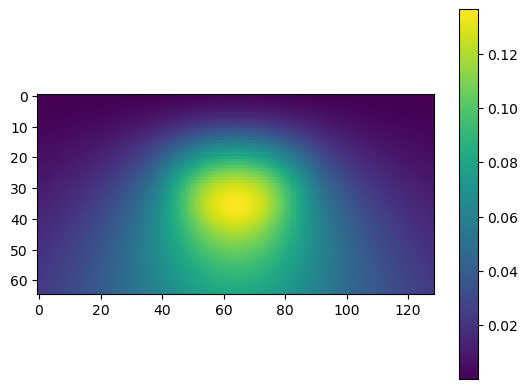

In [ ]:
plt.imshow(stepping.eq1.plasma_psi)
plt.colorbar()

In [ ]:
# Example of evolution with constant applied voltages
stepping.currents_nk_solver.verbose = True
t = 0
flag = 0
history_times = [t]
t_per_step = []


#use the following to reset stepping.eq1 to a new IC
stepping.initialize_from_ICs(eq, profiles,
                             noise_level=.0
                            )
                            #  noise_level=.001, 
                            #  noise_vec=None,
                            #  update_linearization=False,
                            #  update_n_steps=12,
                            #  threshold_svd=.15)
# eqs = deepcopy(stepping.eq1)

history_currents = [stepping.currents_vec]
history_equilibria = [deepcopy(stepping.eq1)]
shapes = faster_shape.shapes_f(stepping.eq1, stepping.profiles1)
history_width = [shapes[0]]
history_o_points = shapes[1]
history_elongation = [shapes[2]]
# history_dJs = [stepping.dJ]

counter = 0
max_count = 10
while counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    stepping.nlstepper_currents_only(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.005,
                                        F_function=stepping.F_function_curr_GS,
                                        # target_relative_tol_GS=.001,
                                        
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=None,
                                        profile_coefficients=None,
                                        # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                        #                                1.2*(1+0.0001*np.random.randn())]),

                                        working_relative_tol_GS=.0001,
                                        # target_relative_unexplained_residual=.1,
                                        max_n_directions=10,
                                        max_Arnoldi_iterations=10,
                                        # max_collinearity=.3,
                                        step_size=1.,
                                        # step_size_curr=.8,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        # blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        # max_no_NK_psi=1.,
                                        # clip=5,
                                        # threshold=1.01,
                                        # clip_hard=.1,
                                        verbose=2,
                                        linear_only=False)       

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq2))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

'Step: 7/9'

'current time t = 0.007'

'current time step dt = 0.001'

starting numerical solve:
max(residual on current eqs) = 3.7726238803322043 mean(residual on current eqs) = 1.092853265878116
This is NK cycle no 0.
['The coeffs applied to the current vec = ', array([-2.21814392, -0.47418732])]
['The final residual on the current (relative): max =', 79.12245026553275, 'mean =', 4.782979245639936]
This is NK cycle no 1.
['The coeffs applied to the current vec = ', array([0.40156254])]
['The final residual on the current (relative): max =', 187.38403890152966, 'mean =', 9.289271547747196]
This is NK cycle no 2.
['The coeffs applied to the current vec = ', array([0.75011807, 0.01589487])]
['The final residual on the current (relative): max =', 9.79332801750772, 'mean =', 0.6384748368977697]
This is NK cycle no 3.
['The coeffs applied to the current vec = ', array([-0.6801498 , -0.38269314])]
['The final residual on the current (relative): max =', 11.899770609042639, 'mean =', 0.7940588835475627]
This is NK cycle no 4.
['The coeffs applied to the current 

KeyboardInterrupt: 

In [ ]:
# Example of evolution with constant applied voltages
t = 0
flag = 0
history_times = [t]
t_per_step = []


#use the following to reset stepping.eq1 to a new IC
stepping.initialize_from_ICs(eq, profiles,
                             noise_level=.0
                            )
                            #  noise_level=.001, 
                            #  noise_vec=None,
                            #  update_linearization=False,
                            #  update_n_steps=12,
                            #  threshold_svd=.15)
# eqs = deepcopy(stepping.eq1)

history_currents = [stepping.currents_vec]
history_equilibria = [deepcopy(stepping.eq1)]
shapes = faster_shape.shapes_f(stepping.eq1, stepping.profiles1)
history_width = [shapes[0]]
history_o_points = shapes[1]
history_elongation = [shapes[2]]
# history_dJs = [stepping.dJ]

counter = 0
max_count = 10
while counter<max_count:
    clear_output(wait=True)
    display(f'Step: {counter}/{max_count-1}')
    display(f'current time t = {t}')
    display(f'current time step dt = {stepping.dt_step}')
    
    t_start = time.time()

    stepping.nlstepper_ceq_GS(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.005,
                                        # F_function=stepping.F_function_ceq_GS,
                                        # target_relative_tol_GS=.001,
                                        
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=None,
                                        profile_coefficients=None,
                                        # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                        #                                1.2*(1+0.0001*np.random.randn())]),

                                        working_relative_tol_GS=.0002,
                                        # target_relative_unexplained_residual=.1,
                                        # max_n_directions=3,
                                        # max_Arnoldi_iterations=3,
                                        max_collinearity=.6,
                                        step_size=1.1,
                                        # step_size_curr=.8,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        # blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        # max_no_NK_psi=1.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=2,
                                        linear_only=False)       

   
    t_end = time.time()
    t_per_step.append(t_end-t_start)

    t += stepping.dt_step
    history_times.append(t)
    shapes = faster_shape.shapes_f(stepping.eq2, stepping.profiles2)

    history_currents.append(stepping.currents_vec)
    history_equilibria.append(deepcopy(stepping.eq2))
    history_width.append(shapes[0])
    history_o_points = np.append(history_o_points,shapes[1], axis=0)
    history_elongation.append(shapes[2])
    # history_dJs.append(stepping.dJ)
    counter += 1

history_currents = np.array(history_currents)
history_times = np.array(history_times)
history_o_points = np.array(history_o_points)


# Evolution of tracked values
fig, axs = plt.subplots(2, 3, figsize=(10, 5), dpi=80, constrained_layout=True)
axs_flat = axs.flat

axs_flat[0].plot(history_times, history_o_points[:, 0],'k+')
axs_flat[0].set_xlabel('Time')
axs_flat[0].set_ylabel('O-point $R$')

axs_flat[1].plot(history_times, history_o_points[:, 1],'k+')
axs_flat[1].set_xlabel('Time')
axs_flat[1].set_ylabel('O-point $Z$')

axs_flat[2].plot(history_times, history_o_points[:, 2],'k+')
axs_flat[2].set_xlabel('Time')
axs_flat[2].set_ylabel('O-point $\Psi$')

axs_flat[3].plot(history_times, history_currents[:,-1]*stepping.plasma_norm_factor,'k+')
axs_flat[3].set_xlabel('Time')
axs_flat[3].set_ylabel('Plasma current')

axs_flat[4].plot(history_times, history_width,'k+')
axs_flat[4].set_xlabel('Time')
axs_flat[4].set_ylabel('Plasma width')

axs_flat[5].plot(history_times, history_elongation,'k+')
axs_flat[5].set_xlabel('Time')
axs_flat[5].set_ylabel('Plasma elongation')

'Step: 2/9'

'current time t = 0.002'

'current time step dt = 0.001'

starting numerical solve:
max(residual on current eqs) = 0.24667669671729991 mean(residual on current eqs) = 0.013989060035090508
This is NK cycle no 0.
['The coeffs applied to the current vec = ', array([-0.48516287,  0.79977522])]
['The final residual on the current (relative): max =', 0.15437634778419207, 'mean =', 0.008654933908678832]
This is NK cycle no 1.
['The coeffs applied to the current vec = ', array([-4.70621604,  1.69135563, -1.45422975])]
['The final residual on the current (relative): max =', 0.03590558369171423, 'mean =', 0.002803315157331343]
This is NK cycle no 2.
['The coeffs applied to the current vec = ', array([-3.88801268,  0.996856  , -0.89967905])]
['The final residual on the current (relative): max =', 0.04785088543822172, 'mean =', 0.0025235996249808024]
This is NK cycle no 3.
['The coeffs applied to the current vec = ', array([-2.33351158,  0.47350998, -0.21871852])]
['The final residual on the current (relative): max =', 0.05887083221739341, 'mean =', 0.00

KeyboardInterrupt: 

In [ ]:
stepping.currents_nk_solver.verbose = True

In [ ]:
stepping.F_function_ceq_GS(stepping.trial_currents, U_active, 1e-8)

trial_currents [ 6.74719518e+03  1.85648691e+02  1.90896723e+03  9.01723148e+02
  1.46990206e+03 -3.60310551e+02  5.59944249e+02 -8.70786082e+02
 -3.16670293e+02 -1.36982763e+01 -3.74566032e+02 -7.71583539e-03
  1.64795016e+00  6.63821027e-02 -1.17386490e+00  7.25034303e-01
  5.66546685e-01  1.56971468e-01  4.65496519e-01  2.14887604e+00
  1.91754082e-01  2.86248498e+00  1.99204357e+00  1.18239204e-01
  4.46693637e+00  6.17606493e+02]
hatIy_1 0.0008147169097076831


array([ 1.42109621e-03,  2.20355062e-03,  1.73570927e-03,  1.63819093e-03,
        1.55202129e-03,  3.67808505e-03,  2.01858844e-03,  3.70633805e-03,
        3.30248558e-03,  1.03117762e-02, -1.15822537e-03, -2.32366538e-05,
        1.31829559e-03,  2.98983852e-05,  4.27491772e-04,  4.46324414e-04,
        3.28615557e-04,  7.77429521e-05,  6.66791603e-04,  7.14912541e-04,
        6.49484529e-05,  5.64442400e-04,  3.90364439e-04,  2.15005934e-05,
       -4.39043519e-05, -2.05744122e-02])

In [ ]:
stepping.F_function_ceq_GS(stepping.trial_currents+stepping.currents_nk_solver.last_candidate_step, U_active, 1e-8)

trial_currents [ 6.74720654e+03  1.85666321e+02  1.90898112e+03  9.01736256e+02
  1.46991448e+03 -3.60281120e+02  5.59960406e+02 -8.70756422e+02
 -3.16643862e+02 -1.36157438e+01 -3.74575226e+02 -7.88908967e-03
  1.65850632e+00  6.66236043e-02 -1.17045015e+00  7.28604622e-01
  5.69176331e-01  1.57594633e-01  4.70830121e-01  2.15459582e+00
  1.92274513e-01  2.86700094e+00  1.99516757e+00  1.18411941e-01
  4.46658438e+00  6.17441925e+02]
hatIy_1 0.0008149147166894295


array([-3.24880568e-03,  2.95104571e-03,  4.46245262e-03,  4.35545137e-03,
        4.53611473e-03,  5.97527326e-03,  4.06859562e-03,  7.99050545e-03,
        7.90177632e-03,  2.27287296e-02, -1.04536329e-01, -3.79691383e-05,
       -4.41092168e-03, -2.41852130e-04,  8.96757122e-03,  1.14543333e-03,
        7.24598033e-04,  9.44099334e-05,  4.17656819e-03,  9.77209414e-04,
        7.25457590e-05,  3.60434361e-04,  2.36112519e-04,  3.02623474e-06,
       -1.33613452e-03, -8.51700106e-02])

In [ ]:
[-3.24880542e-03  2.95104576e-03  4.46245241e-03  4.35545102e-03
  4.53611417e-03  5.97527226e-03  4.06859389e-03  7.99050362e-03
  7.90177412e-03  2.27287215e-02 -1.04536347e-01 -3.79839469e-05
 -4.41092383e-03 -2.41854522e-04  8.96757247e-03  1.14543401e-03
  7.24597507e-04  9.44086200e-05  4.17656844e-03  9.77209479e-04
  7.25448294e-05  3.60434705e-04  2.36111844e-04  3.02541528e-06
 -1.33613441e-03 -8.51700208e-02]

In [ ]:
stepping.currents_nk_solver.last_candidate_step

array([ 0.01136734,  0.01762967,  0.01388771,  0.01310805,  0.01241942,
        0.02943124,  0.01615675,  0.02966041,  0.02643063,  0.08253249,
       -0.00919316, -0.00017325,  0.01055617,  0.0002415 ,  0.00341475,
        0.00357032,  0.00262965,  0.00062317,  0.0053336 ,  0.00571978,
        0.00052043,  0.00451597,  0.003124  ,  0.00017274, -0.00035199,
       -0.16456839])

In [ ]:
stepping.currents_nk_solver.G

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
stepping.currents_nk_solver.last_useful_residual

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
stepping.F_function_ceq_GS(stepping.trial_currents+stepping.currents_nk_solver.last_candidate_step, U_active, 1e-8)

self.currents_vec [6746.83574685  185.73963537 1908.93551587  901.76530297 1469.93329377
 -360.3167095   559.93968771 -870.73355081 -316.59507815  -13.93065205
 -375.30991764    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
  620.        ]
trial_currents [ 6.74720654e+03  1.85666321e+02  1.90898112e+03  9.01736256e+02
  1.46991448e+03 -3.60281120e+02  5.59960406e+02 -8.70756422e+02
 -3.16643862e+02 -1.36157438e+01 -3.74575226e+02 -7.88908967e-03
  1.65850632e+00  6.66236043e-02 -1.17045015e+00  7.28604622e-01
  5.69176331e-01  1.57594633e-01  4.70830121e-01  2.15459582e+00
  1.92274513e-01  2.86700094e+00  1.99516757e+00  1.18411941e-01
  4.46658438e+00  6.17441925e+02]
hatIy_0 0.0008133411255559042
active_voltage_vec [1137.99481487   18.99011875  244.60194344  112.95647271  219.92255304
  -57.72027285  139.3393044  -164.39842114  -65.01724238   -1.21069789
  -34

array([-3.24880542e-03,  2.95104576e-03,  4.46245241e-03,  4.35545102e-03,
        4.53611417e-03,  5.97527226e-03,  4.06859389e-03,  7.99050362e-03,
        7.90177412e-03,  2.27287215e-02, -1.04536347e-01, -3.79839469e-05,
       -4.41092383e-03, -2.41854522e-04,  8.96757247e-03,  1.14543401e-03,
        7.24597507e-04,  9.44086200e-05,  4.17656844e-03,  9.77209479e-04,
        7.25448294e-05,  3.60434705e-04,  2.36111844e-04,  3.02541528e-06,
       -1.33613441e-03, -8.51700208e-02])

In [ ]:
[ 9.09542711e-04  4.83271154e-04 -5.95225729e-04 -1.16266685e-03
 -1.98965830e-03 -3.36307159e-03 -6.53464780e-03 -6.60170143e-03
 -8.10982470e-03 -2.98405384e-02 -7.25326296e-02 -2.91478405e-05
 -8.56353959e-03 -3.05812097e-04  5.31980884e-03  7.47097813e-05
 -3.41285846e-06 -4.22038495e-05  1.23886407e-03  6.23085297e-05
  3.58751956e-06 -2.97928097e-04 -2.12422698e-04 -1.77120029e-05
  3.38205423e-04 -4.20578496e-02]

In [ ]:
stepping.F_function_ceq_GS(stepping.trial_currents, U_active, stepping.rtol_NK)

array([ 1.41763594e-03,  2.19254907e-03,  1.72074796e-03,  1.62018798e-03,
        1.52922347e-03,  3.63282171e-03,  1.96342278e-03,  3.63995728e-03,
        3.22892984e-03,  1.00529520e-02, -1.61925238e-03, -2.71514805e-05,
        1.25457142e-03,  2.71267834e-05,  4.59070774e-04,  4.44127695e-04,
        3.26356267e-04,  7.66328546e-05,  6.70513436e-04,  7.10759160e-04,
        6.43128608e-05,  5.59026937e-04,  3.86339694e-04,  2.10358309e-05,
       -4.14893142e-05, -2.07144720e-02])

In [ ]:
stepping.nlstepper_GS_ceq(active_voltage_vec=U_active, 
                                        target_relative_tol_currents=.001,
                                        # F_function=stepping.F_function_ceq_GS,
                                        # target_relative_tol_GS=.001,
                                        
                                        # profile parameters are being jittered around at random 
                                        profile_parameter=None,
                                        profile_coefficients=None,
                                        # profile_parameter=8.1e3*(1+0.001*np.random.randn()),
                                        # profile_coefficients=np.array([1.8*(1+0.0001*np.random.randn()),
                                        #                                1.2*(1+0.0001*np.random.randn())]),

                                        # working_relative_tol_GS=.002,
                                        # target_relative_unexplained_residual=.5,
                                        # max_n_directions=3,
                                        # max_Arnoldi_iterations=3,
                                        # max_collinearity=.3,
                                        # step_size=.8,
                                        # step_size_curr=.8,
                                        # scaling_with_n=0,
                                        # relative_tol_for_nk_psi=.002,
                                        # blend_GS=.5,
                                        # blend_psi=1,
                                        # curr_eps=1e-8,
                                        # max_no_NK_psi=1.,
                                        # clip=5,
                                        # threshold=1.5,
                                        # clip_hard=1.5,
                                        verbose=2,
                                        linear_only=False)  

starting numerical solve:
max(residual on current eqs) = 2.105081822208472 mean(residual on current eqs) = 0.1285495164121924
res_curr [ 9.09723251e-04  4.83027225e-04 -5.95532037e-04 -1.16301780e-03
 -1.99007643e-03 -3.36396378e-03 -6.53556752e-03 -6.60291205e-03
 -8.11110478e-03 -2.98450578e-02 -7.25397805e-02 -2.65755455e-05
 -8.56462722e-03 -3.05446498e-04  5.32032677e-03  7.45332608e-05
 -3.37333182e-06 -4.19942229e-05  1.23889620e-03  6.21956494e-05
  3.73954781e-06 -2.98128130e-04 -2.12403788e-04 -1.75761540e-05
  3.38309289e-04 -4.20589877e-02]
[0, 'full cycle curr residual', 0.590459212623348, 0.052593486870549794]


/Users/nicola.amorisco/Library/CloudStorage/OneDrive-ScienceandTechnologyFacilitiesCouncil/freegsnke/freegsnke/nk_solver.py:116: RuntimeWarning: invalid value encountered in true_divide
  self.Gn[:, self.n_it] = self.G[:,self.n_it]/np.linalg.norm(self.G[:,self.n_it])


LinAlgError: Singular matrix

In [ ]:
stepping.trial_currents

array([ 6.74719518e+03,  1.85648692e+02,  1.90896723e+03,  9.01723146e+02,
        1.46990206e+03, -3.60310556e+02,  5.59944240e+02, -8.70786092e+02,
       -3.16670304e+02, -1.36983185e+01, -3.74566136e+02, -7.71644731e-03,
        1.64793801e+00,  6.63815793e-02, -1.17385732e+00,  7.25034451e-01,
        5.66546671e-01,  1.56971360e-01,  4.65498304e-01,  2.14887616e+00,
        1.91754053e-01,  2.86248459e+00,  1.99204326e+00,  1.18239148e-01,
        4.46693684e+00,  6.17606432e+02])

In [ ]:
stepping.linearised_sol.stepper(It=stepping.currents_vec, 
                                active_voltage_vec=U_active)
                                                         

array([ 2.01495445e-04,  1.06986147e-04, -1.31904942e-04, -2.57597889e-04,
       -4.40783871e-04, -7.45087452e-04, -1.44756890e-03, -1.46248510e-03,
       -1.79653611e-03, -6.61040948e-03, -1.60669031e-02, -5.88624217e-06,
       -1.89698721e-03, -6.76536276e-05,  1.17840410e-03,  1.65084409e-05,
       -7.47162388e-07, -9.30133931e-06,  2.74404266e-04,  1.37757720e-05,
        8.28275905e-07, -6.60326755e-05, -4.70455117e-05, -3.89295861e-06,
        7.49324377e-05, -9.31568413e-03])

In [ ]:
stepping.trial_currents-stepping.currents_vec

array([ 0.35943118, -0.09094333,  0.03171558, -0.04215681, -0.03123677,
        0.00615364,  0.00455223, -0.05254087, -0.07522625,  0.23233355,
        0.74378189, -0.00771645,  1.64793801,  0.06638158, -1.17385732,
        0.72503445,  0.56654667,  0.15697136,  0.4654983 ,  2.14887616,
        0.19175405,  2.86248459,  1.99204326,  0.11823915,  4.46693684,
       -2.39356764])